In [187]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunctions import * 
from random import uniform
import random
import pickle
import math
import time
%matplotlib inline
import os

# Comparison of Simulation & Experiments shifted source
- interferogram multiplied by Hanning function before transformed
- in fourier space, frequency lower than 30GHz set to zero (hard boundary)
- mean of fourier signal subtracted from fourier signal 
- transformed back to delay space 
- shifted/rotated to center at 0

In [188]:
def nearest(array, value1,value2):
    array = np.asarray(array)
    idx1 = (np.abs(array - value1)).argmin()
    idx2 = (np.abs(array - value2)).argmin()
    #return array[idx1],array[idx2],idx1,idx2
    return idx1, idx2

In [341]:
Dir1 = os.listdir('1/')
SimDir = []
for i in range(len(Dir1)):
    if Dir1[i][-3:]=='pkl':
        SimDir.append(Dir1[i])
        #print(Dir1[i][-6:-4])
        
Dir2 = os.listdir('/Users/Lab/Desktop/data_for_mira/144GHz/')
ExpDir = []
for i in range(len(Dir2)):
    if Dir2[i][-3:]=='pkl':
        ExpDir.append(Dir2[i])
        #print(Dir2[i][-6:-4])
        
#checking for duplicates
#for i in range(len(ExpDir)):
    #for j in range(len(ExpDir)):
        #if i !=j:
            #if ExpDir[i][-6:-4]==ExpDir[j][-6:-4]:
                #print(ExpDir[i][-6:-4])

In [344]:
ExpDir[0][-6]

'1'

In [249]:
def SaveComparisonSim(name):
    with open('Delay/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
        Delay2 = pickle.load(F) #same for all simulations
    with open('1/'+name,'rb') as F:
        Ij2 = pickle.load(F)
    SimNormFactor = 50852.3473551
    Lamd =2.089
    Nsize = Nsized(Lamd)
    xtot = 36*0.95630475596*4 #total length of the scan
    df = 1/xtot
    f = df*np.arange(1+Nsize/2)-df/2

    d2 = Ij2
    D2 = np.hanning(int(np.shape(d2)[0]))*d2
    S2 = np.fft.rfft(D2)
    u2 = np.abs(S2)
    # AC coupling
    A = 300*f[:]
    B = u2
    for i in range(len(A)):
        if A[i]<=30:
            B[i]=0
    ifX1 = np.fft.fftshift(np.fft.irfft(B-np.mean(B))) #with mean of B subtracted
    ifX = ifX1
    ifX[415]=max(ifX1) #just set to max of entire interferogram at Delay = 0
    pl.figure()
    pl.title(str(name[-6:-4])+' Simulation')
    pl.ylim(-1.3,1.3)
    pl.plot(Delay2,ifX/SimNormFactor,label = 'AC Simulated')#\nHanning\nNormalized')
    pl.legend()
    pl.savefig('/Users/Lab/Desktop/Comparison/'+str(name[-6:-4])+ 'Sim1_-1.png',dpi=300)
    return

def SaveComparisonExp(name):
    with open('Delay/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
        Delay2 = pickle.load(F) #same for all simulations as reference
    with open('/Users/Lab/Desktop/data_for_mira/144GHz/'+name,'rb',) as F:
        Z = pickle.load(F,encoding='latin1')  
    ExpNormFactor = 1.30118171724
    IjZ1 = Z['sig0F']
    IjZ = np.hanning(int(np.shape(IjZ1)[0]))*IjZ1
    DelayZ = Z['delay0F']
    idx1,idx2 = nearest(DelayZ,Delay2[0],Delay2[-1])# match delay value range from Zhaodi pickle files
    pl.figure()
    pl.title(str(name[-6:-4])+' Experimental')
    pl.ylim(-1.3,1.3)
    pl.plot(DelayZ[idx1:idx2],IjZ[idx1:idx2]/ExpNormFactor,label = 'Experimental\napodized')#\nHanning\nNormalized')
    pl.legend()
    pl.savefig('/Users/Lab/Desktop/Comparison/'+str(name[-6:-4])+ 'Exp1_-1.png',dpi=300)
    return



/Users/Lab/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


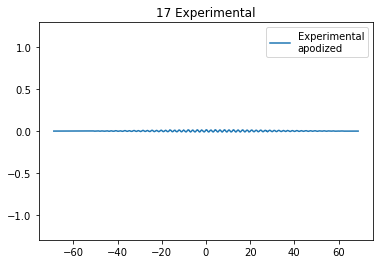

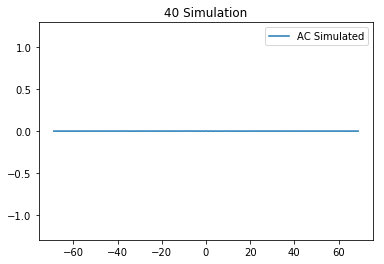

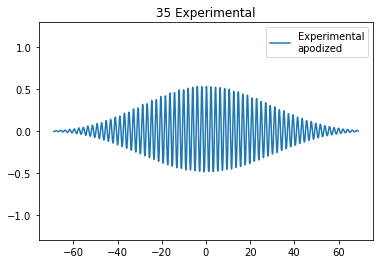

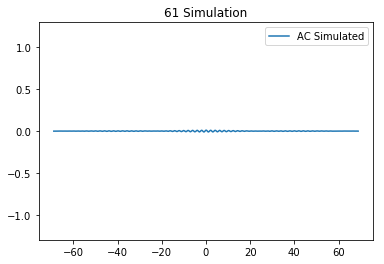

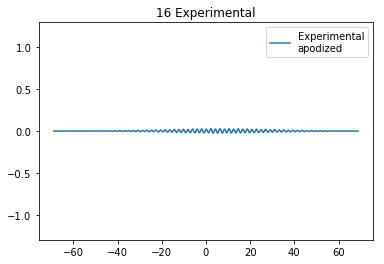

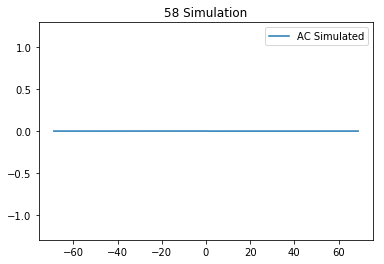

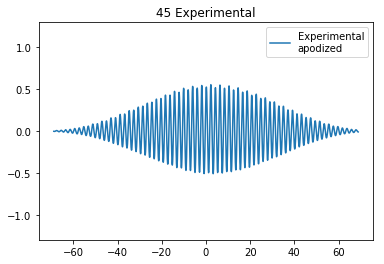

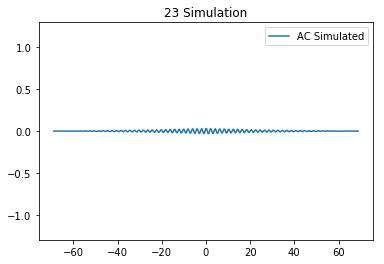

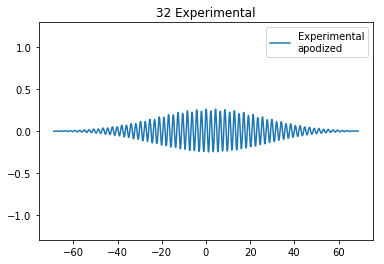

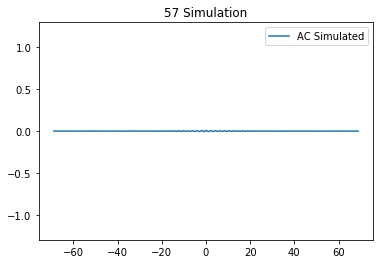

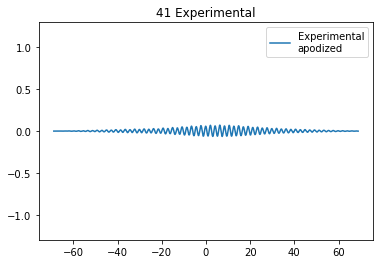

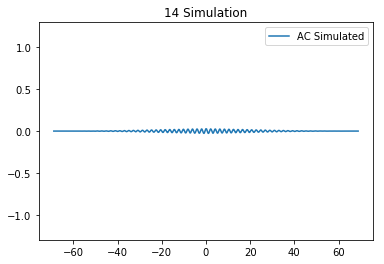

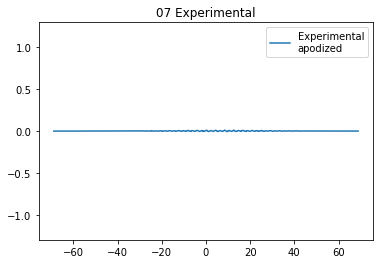

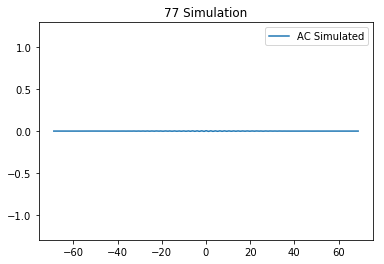

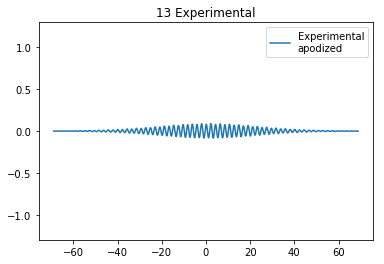

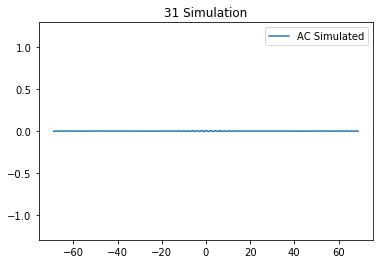

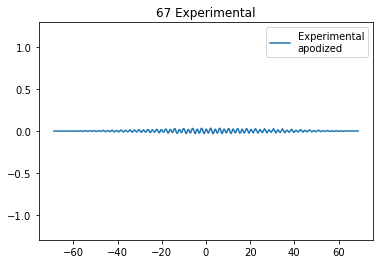

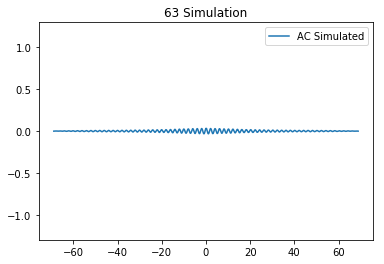

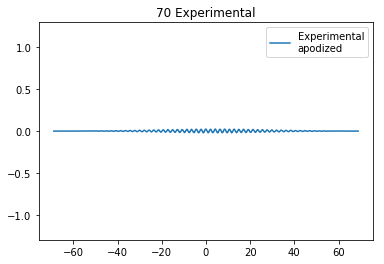

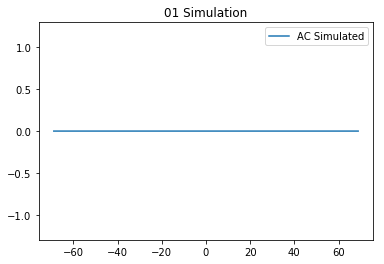

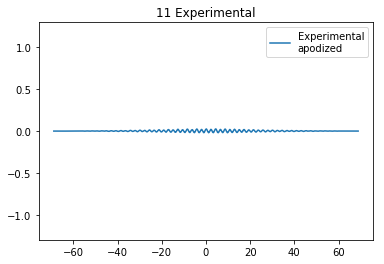

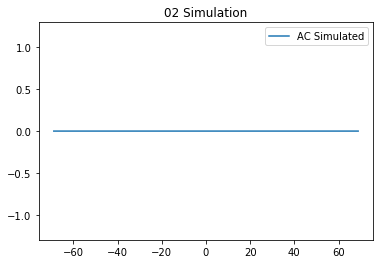

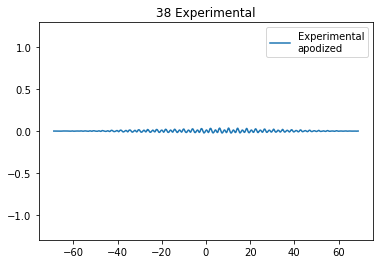

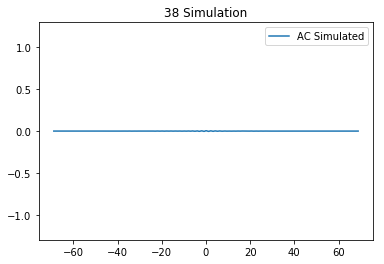

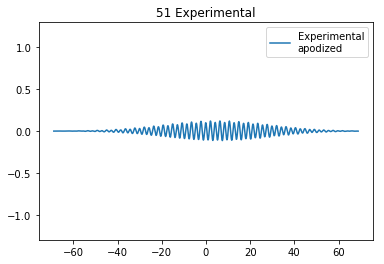

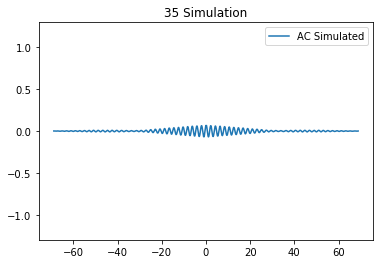

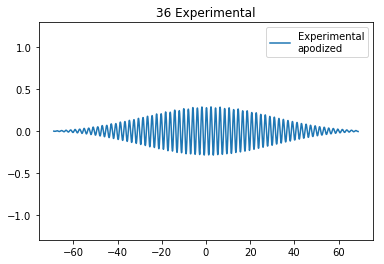

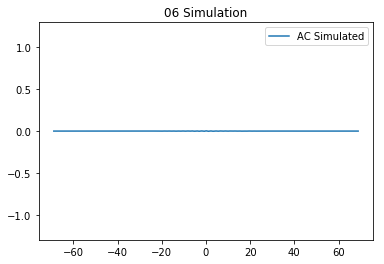

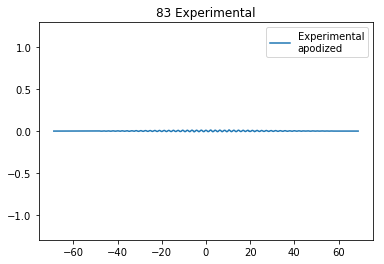

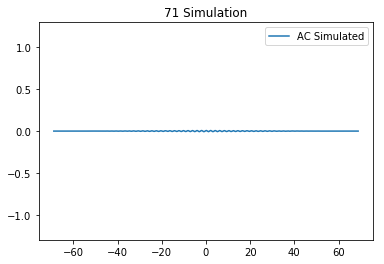

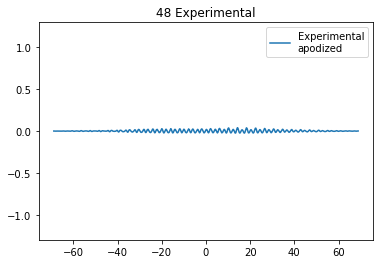

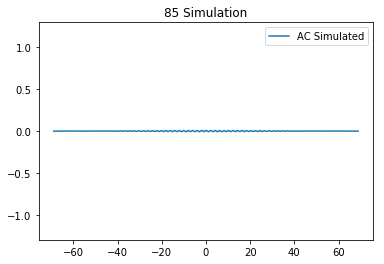

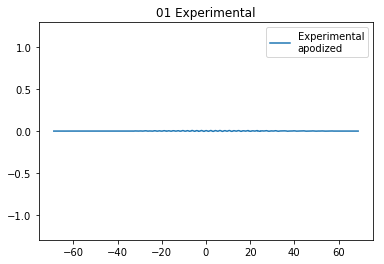

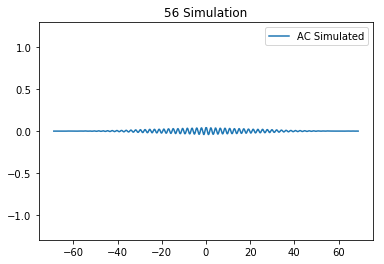

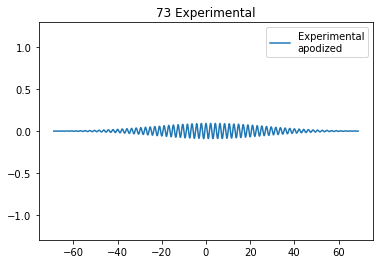

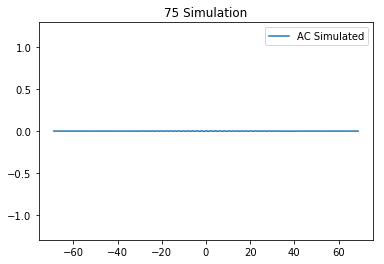

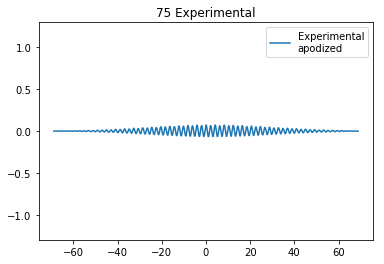

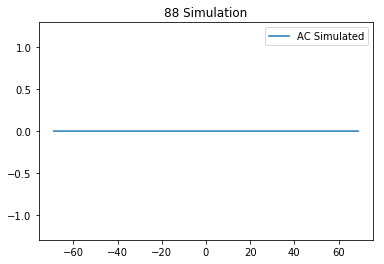

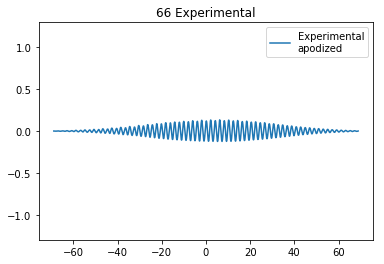

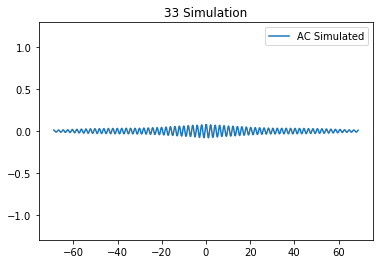

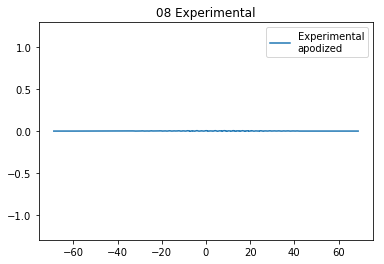

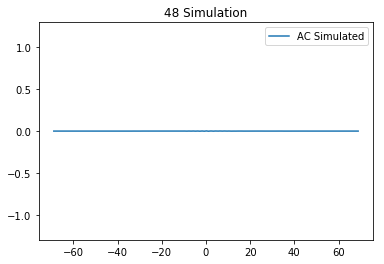

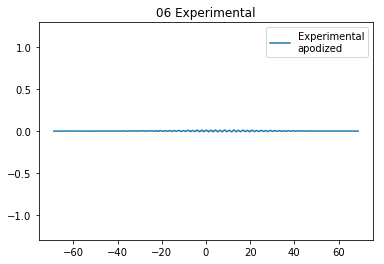

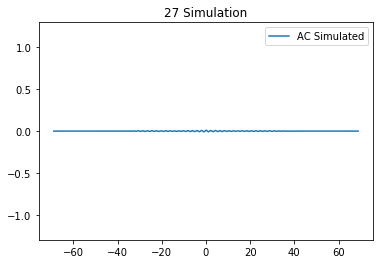

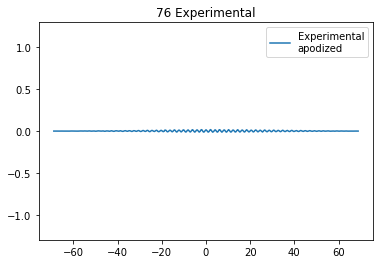

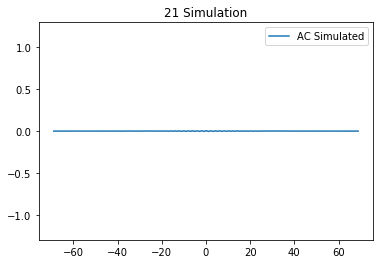

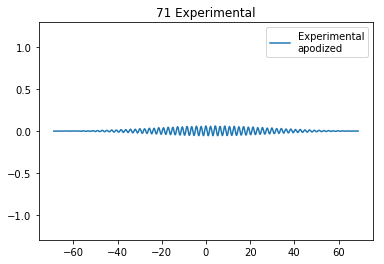

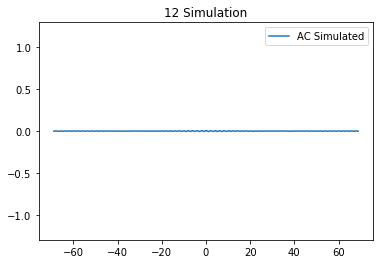

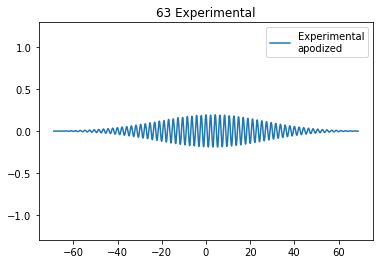

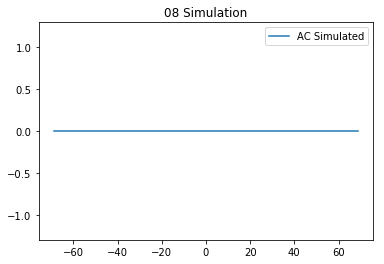

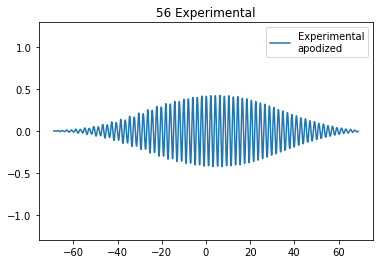

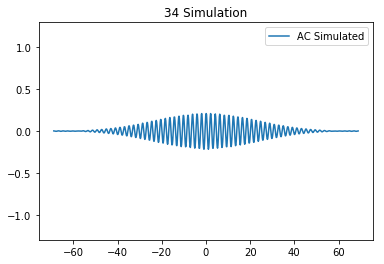

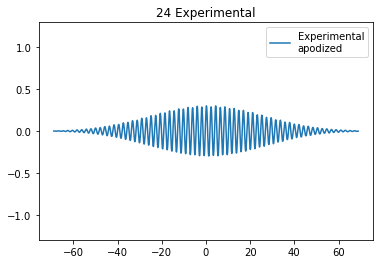

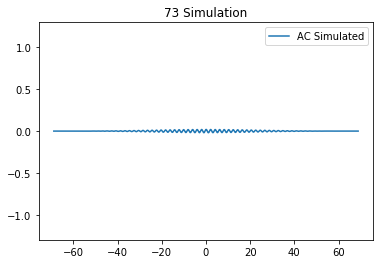

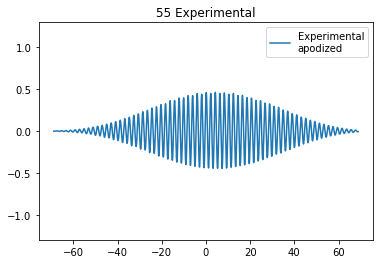

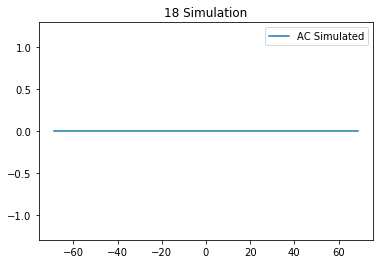

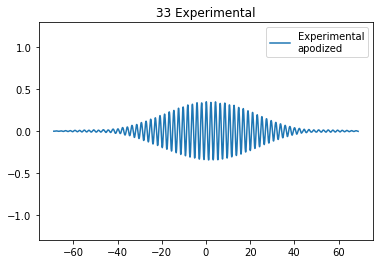

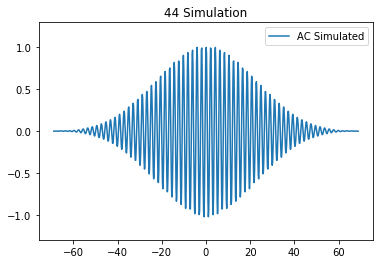

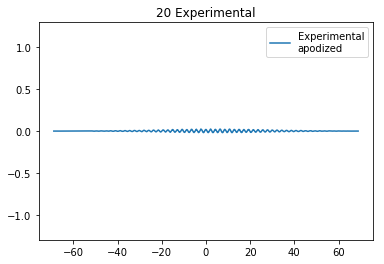

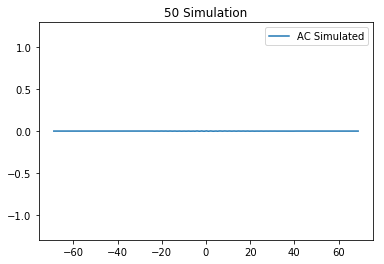

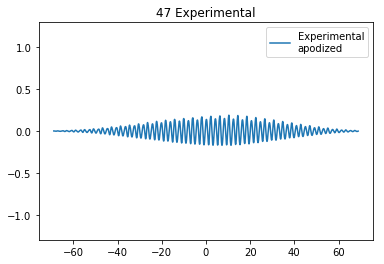

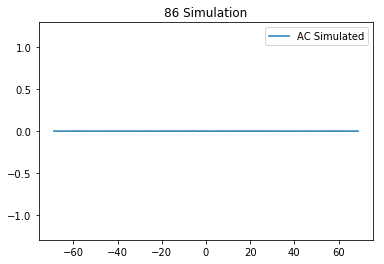

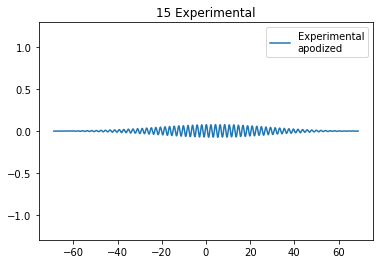

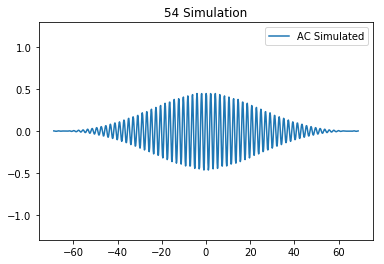

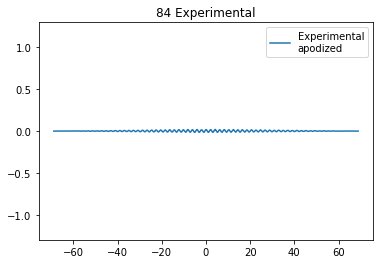

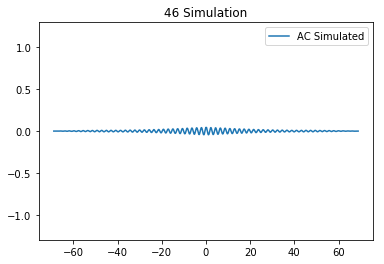

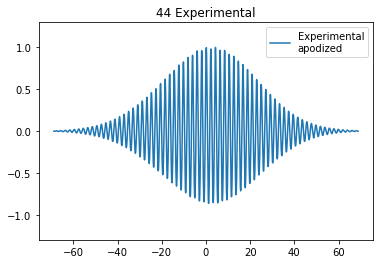

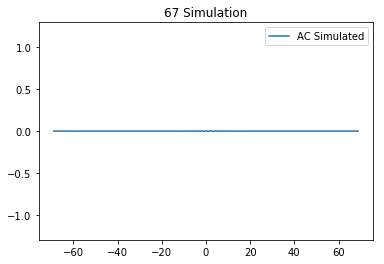

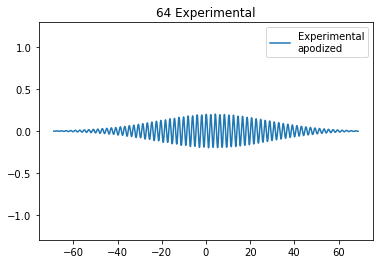

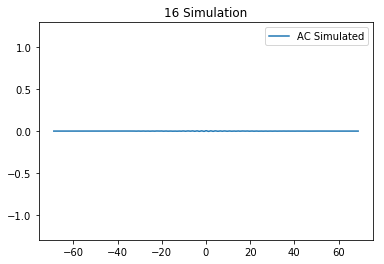

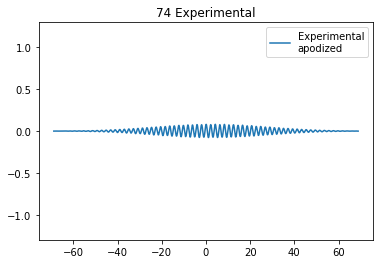

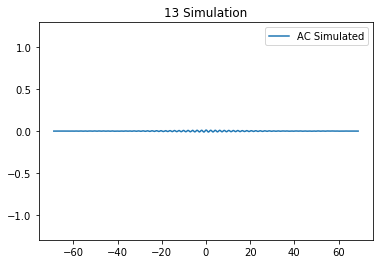

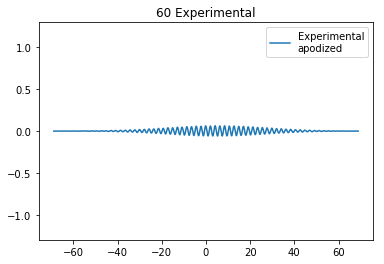

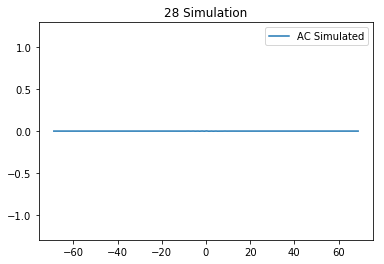

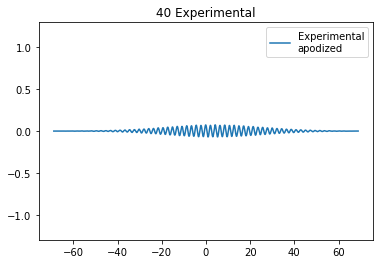

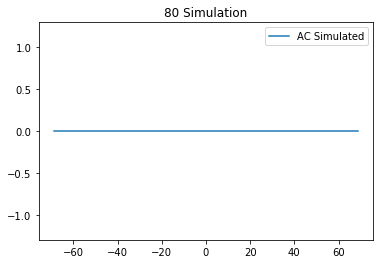

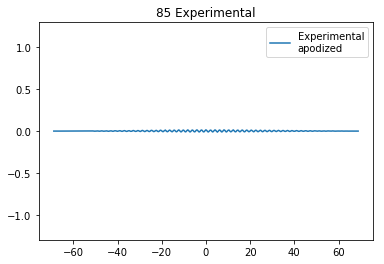

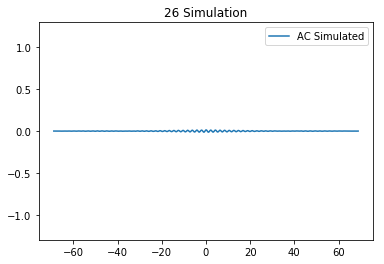

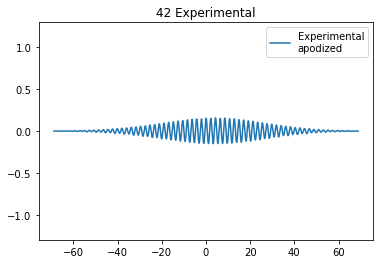

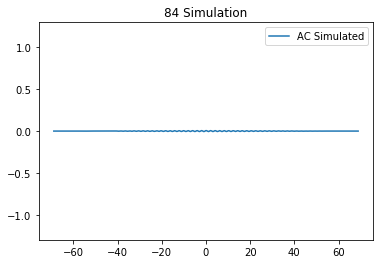

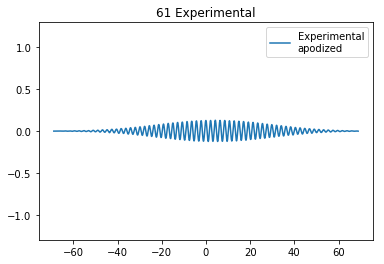

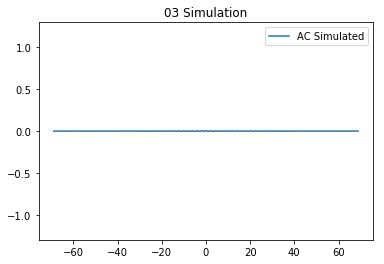

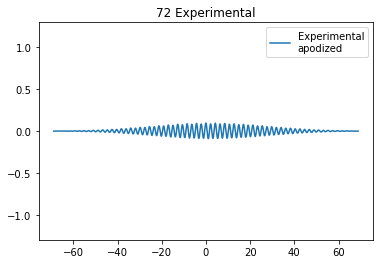

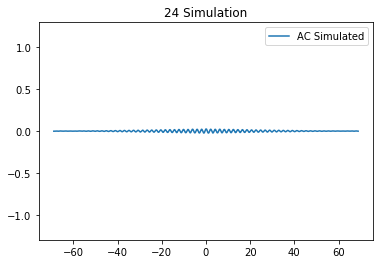

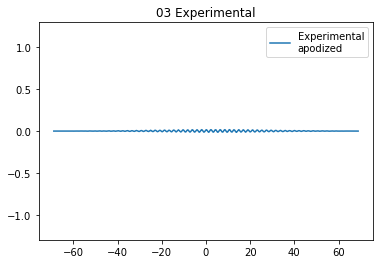

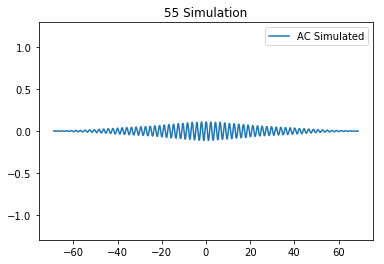

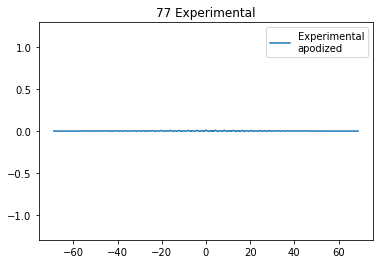

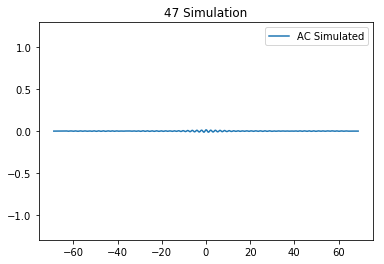

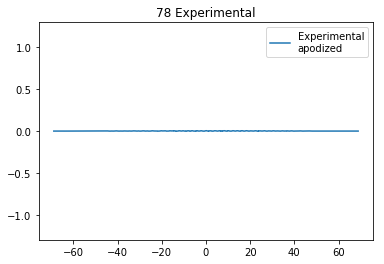

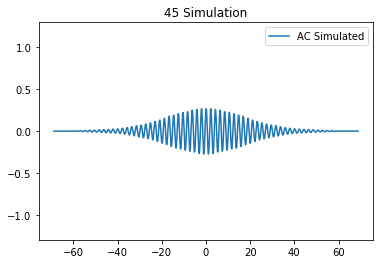

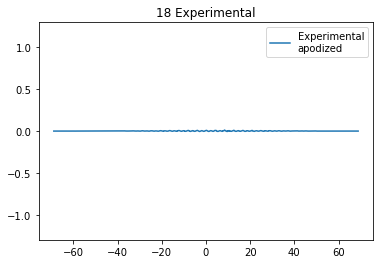

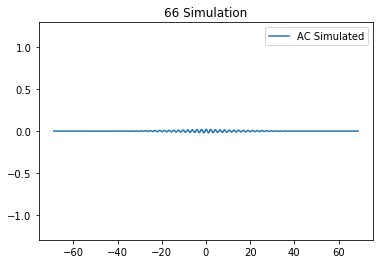

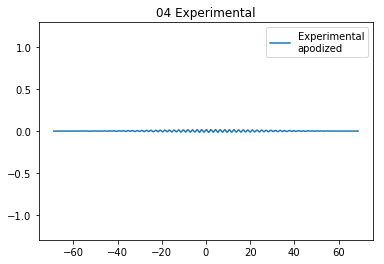

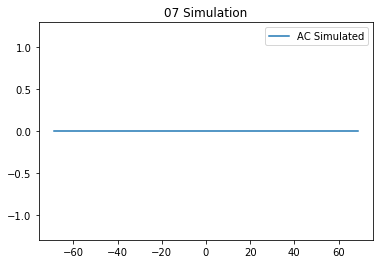

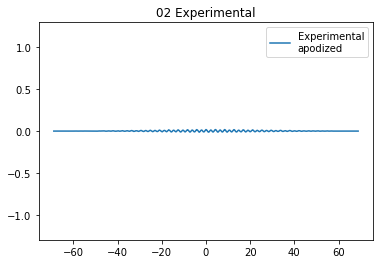

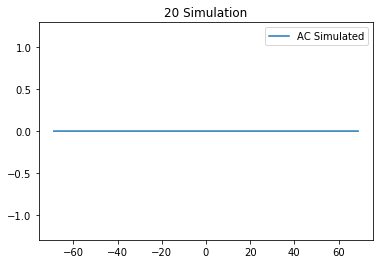

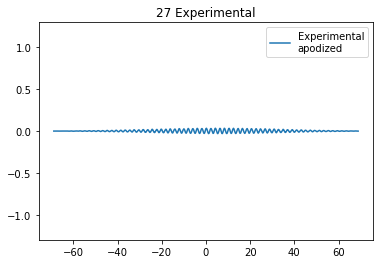

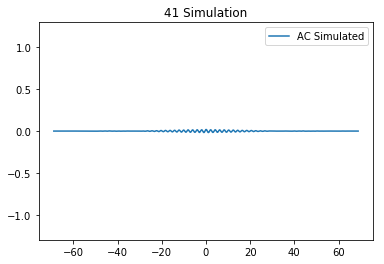

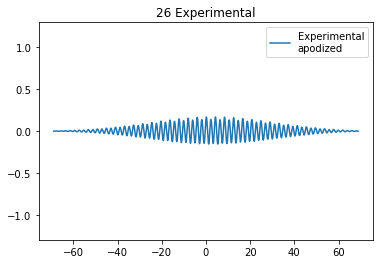

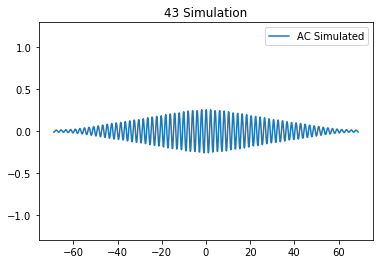

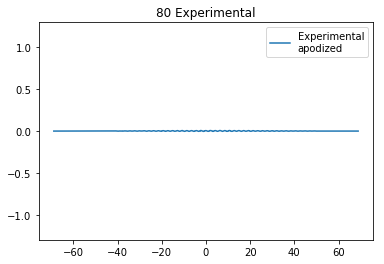

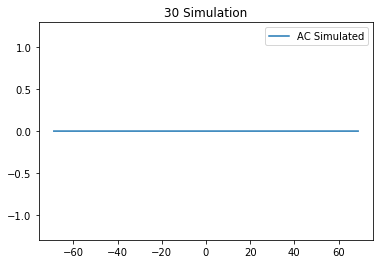

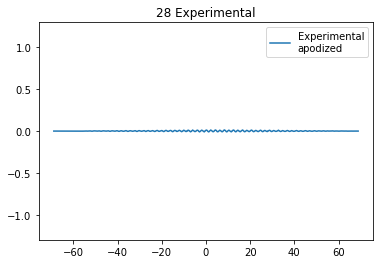

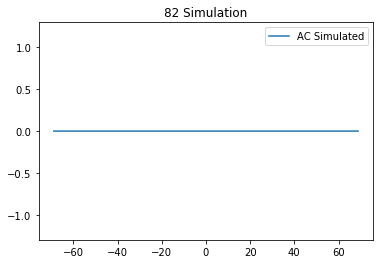

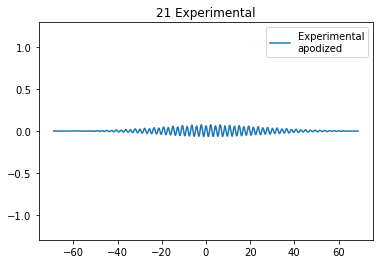

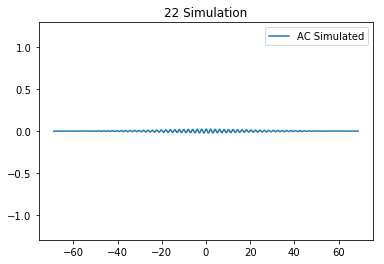

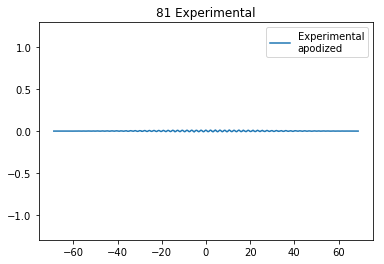

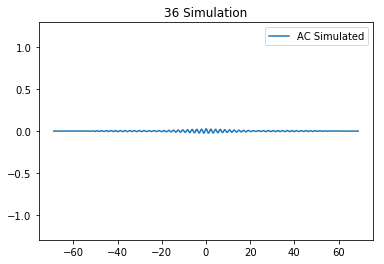

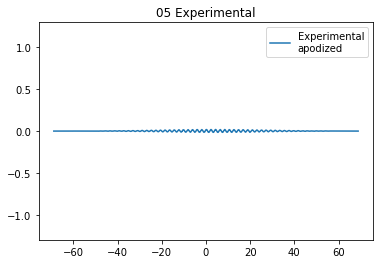

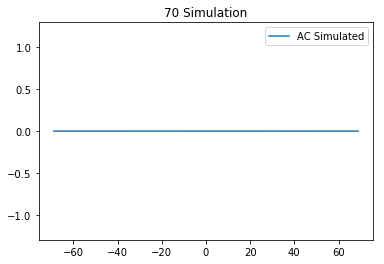

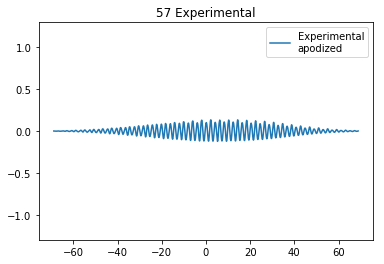

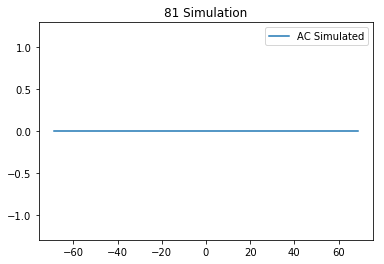

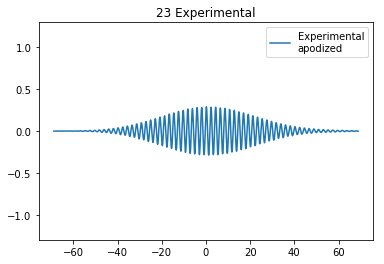

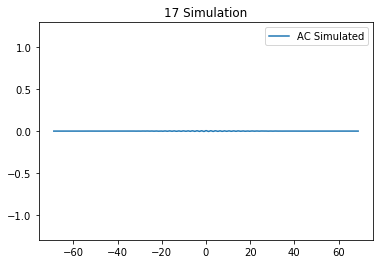

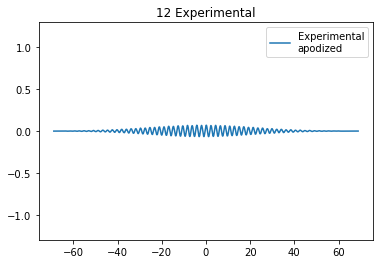

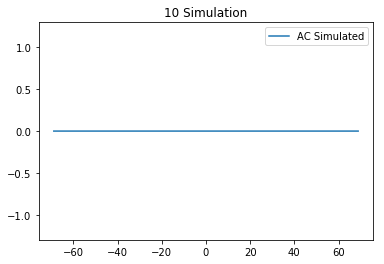

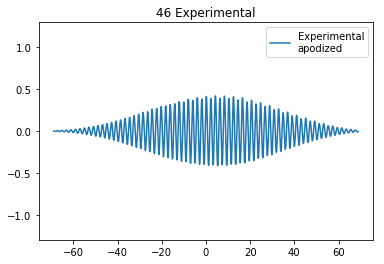

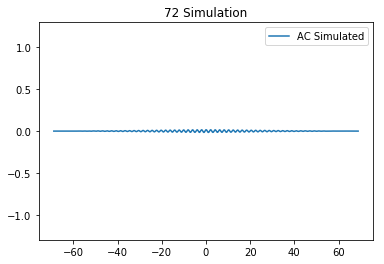

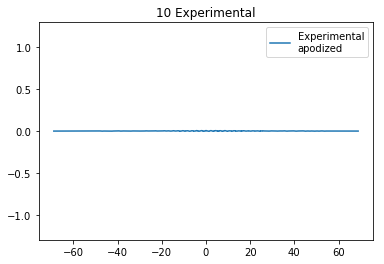

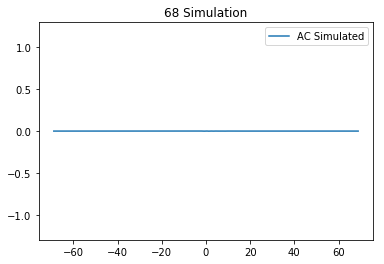

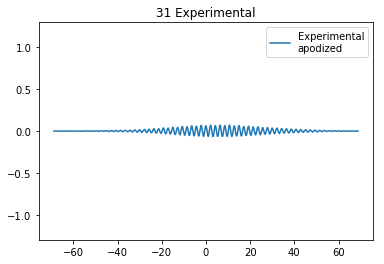

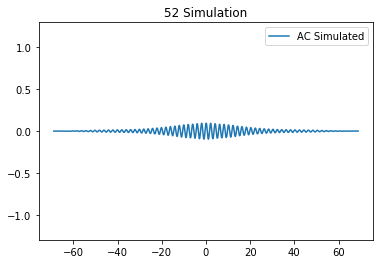

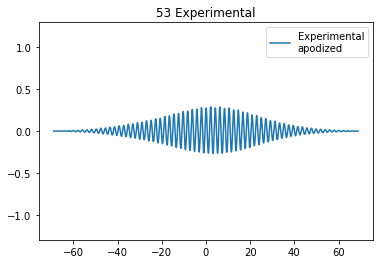

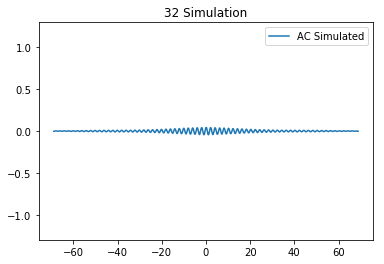

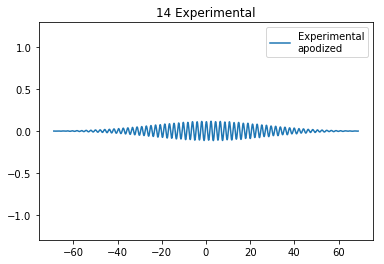

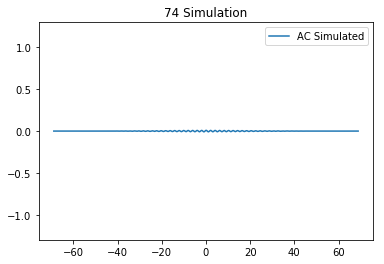

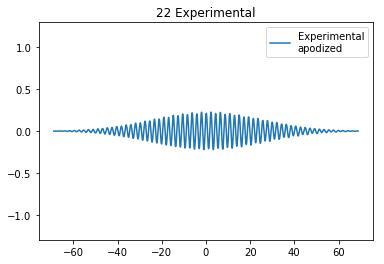

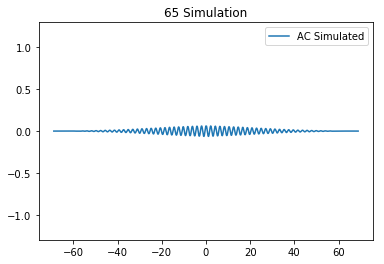

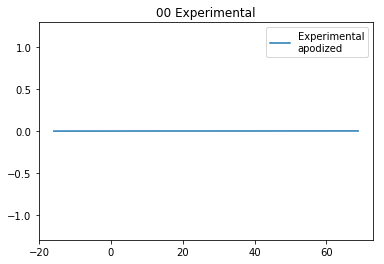

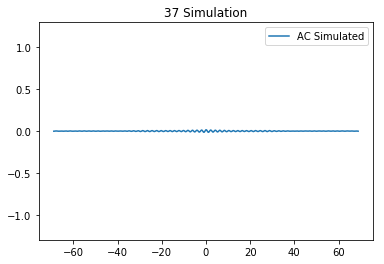

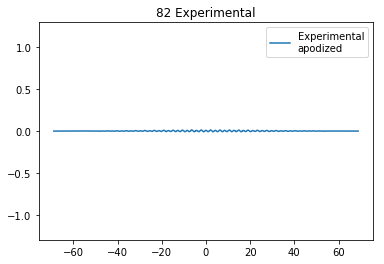

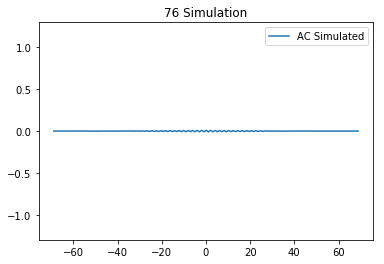

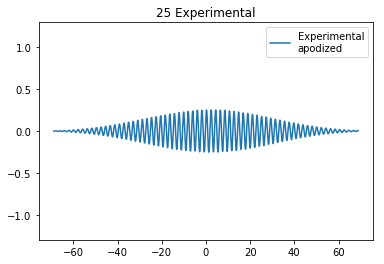

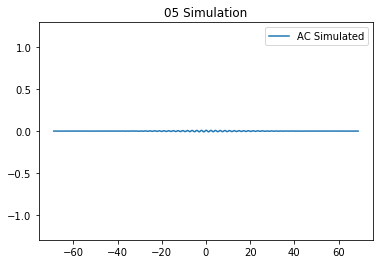

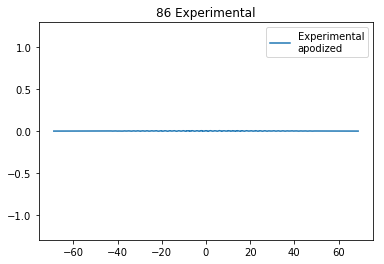

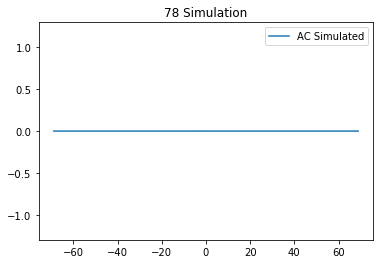

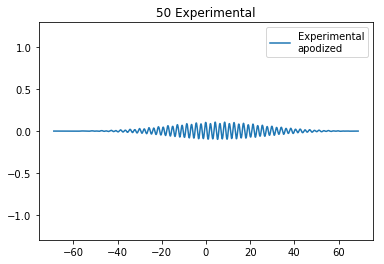

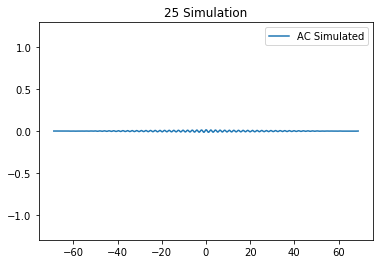

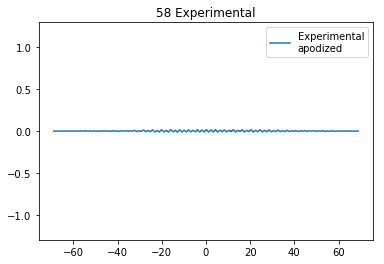

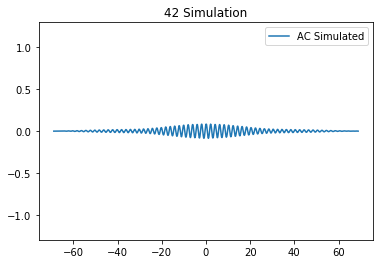

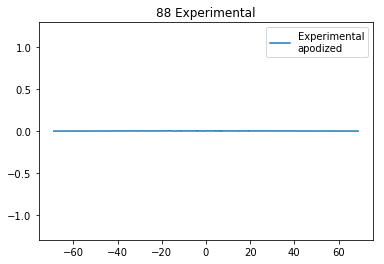

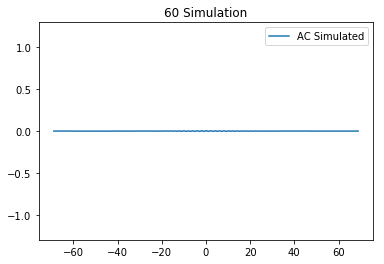

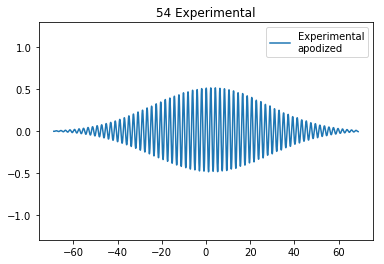

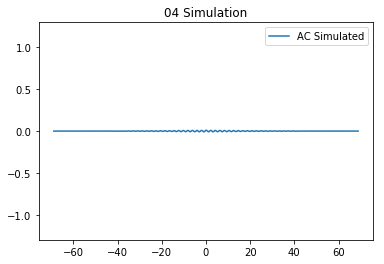

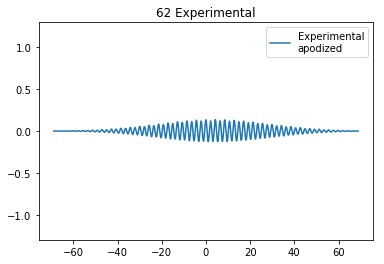

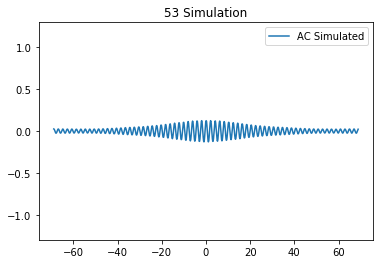

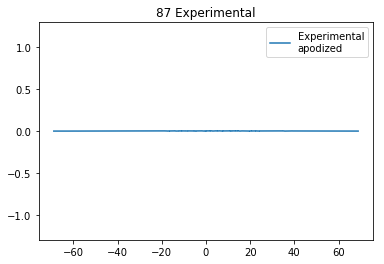

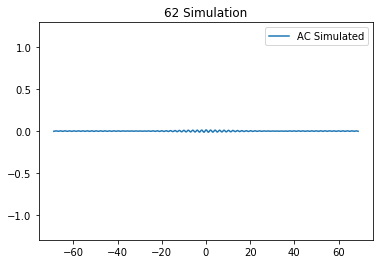

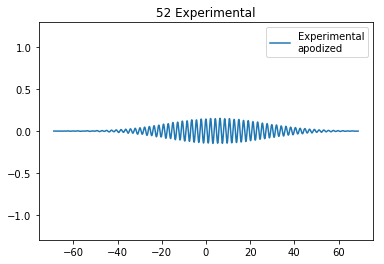

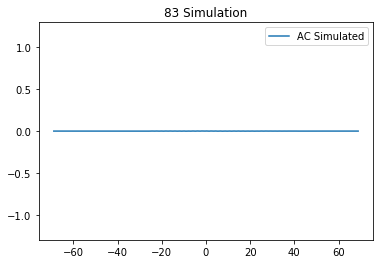

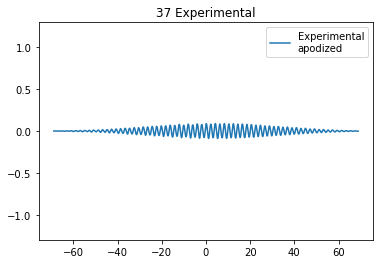

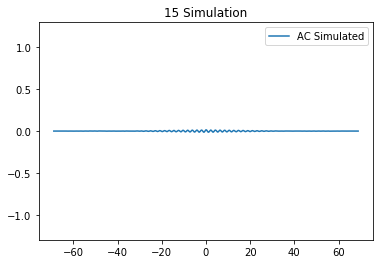

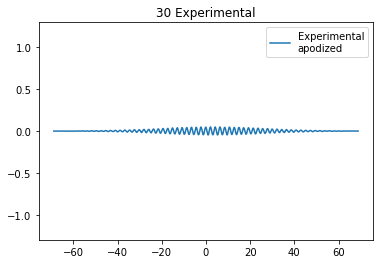

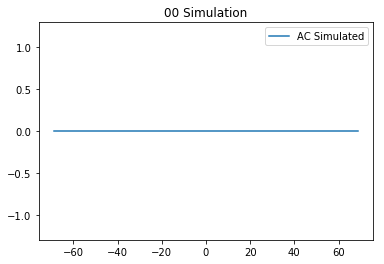

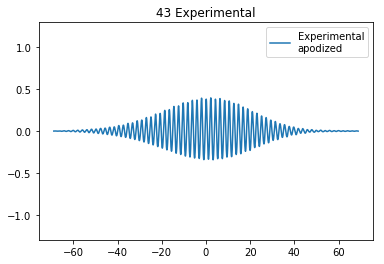

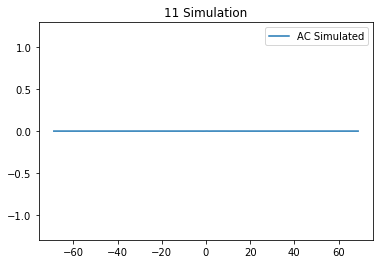

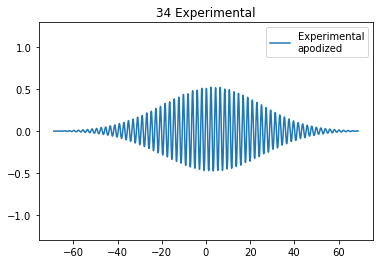

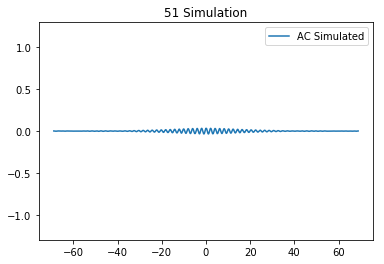

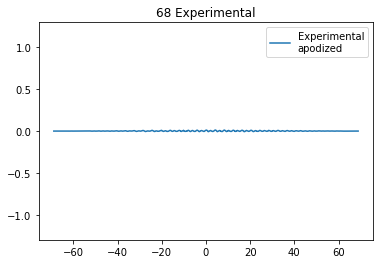

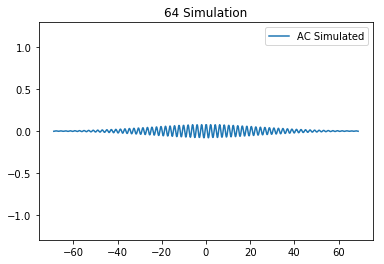

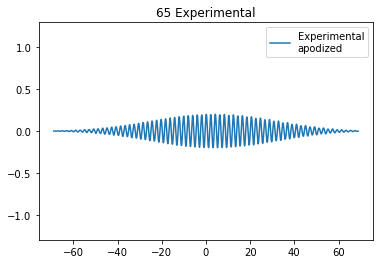

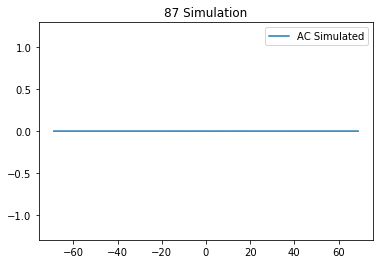

In [250]:
for i in range(81):
    SaveComparisonExp(ExpDir[i])
    SaveComparisonSim(SimDir[i])

In [337]:
# NOW TO SAVE COMPARISONS NORMALIZED WITH YLIMIT ADJUSTED
def SaveComparisonsBoth(simname,expname):
    with open('Delay/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
        Delay2 = pickle.load(F) #same for all simulations
    with open('1/'+simname,'rb') as F:
        Ij2 = pickle.load(F)
    with open('/Users/Lab/Desktop/data_for_mira/144GHz/'+expname,'rb',) as F:
        Z = pickle.load(F,encoding='latin1')  
    SimNormFactor = 50852.3473551
    ExpNormFactor = 1.30118171724
    Lamd =2.089
    Nsize = Nsized(Lamd)
    xtot = 36*0.95630475596*4 #total length of the scan
    df = 1/xtot
    f = df*np.arange(1+Nsize/2)-df/2

    d2 = Ij2
    D2 = np.hanning(int(np.shape(d2)[0]))*d2
    S2 = np.fft.rfft(D2)
    u2 = np.abs(S2)

    A = 300*f[:]
    B = u2
    for i in range(len(A)):
        if A[i]<=30:
            B[i]=0
    ifX1 = np.fft.fftshift(np.fft.irfft(B-np.mean(B))) #with mean of B subtracted
    ifX = ifX1
    ifX[415]=max(ifX1) #just set to max of entire interferogram
    
    IjZ1 = Z['sig0F']
    IjZ = np.hanning(int(np.shape(IjZ1)[0]))*IjZ1
    DelayZ = Z['delay0F']
    idx1,idx2 = nearest(DelayZ,Delay2[0],Delay2[-1])# match delay value range from Zhaodi pickle files

    # now show plots with standard scale
    #LimSim1 = max(ifX/SimNormFactor)
    #LimExp1 = max(IjZ/ExpNormFactor)
    #limB = max(LimSim1+.3*LimSim1,LimExp1+.3*LimExp1)
    
    #pl.figure()
    #pl.title(str(simname[-6:-4]))
    #pl.plot(Delay2,ifX/SimNormFactor,label = 'AC Simulated\nHanning\nNormalized')
    #pl.ylim(-limB,limB)
    #pl.legend()
    #pl.savefig('/Users/Lab/Desktop/Comparison/'+str(simname[-6:-4])+ 'Sim.png',dpi=300)

    #pl.figure()
    #pl.title(str(expname[-6:-4])+' Experimental')
    #pl.plot(DelayZ[idx1:idx2],IjZ[idx1:idx2]/ExpNormFactor,label = 'Experimental\nHanning\nNormalized')
    #pl.ylim(-limB,limB)
    #pl.legend()
    #pl.savefig('/Users/Lab/Desktop/Comparison/'+str(expname[-6:-4])+ 'Exp.png',dpi=300)
    fig,(ax1,ax2)=pl.subplots(2, 1)# sharex=True)
    ax1.set_title(str(simname[-6:-4]))
    ax1.plot(Delay2,ifX/SimNormFactor,label = 'Sim')
    #ax1.set_ylim(-limB,limB)
    ax1.set_ylim(-1.3,1.3)
    ax1.legend()
    ax2.plot(DelayZ[idx1:idx2],IjZ[idx1:idx2]/ExpNormFactor,label = 'Exp')
    #ax2.set_ylim(-limB,limB)
    ax2.set_ylim(-1.3,1.3)
    ax2.legend()
    pl.tight_layout()
    pl.savefig('/Users/Lab/Desktop/Comparison/'+str(expname[-6:-4])+ '.png',dpi=300)

    return



/Users/Lab/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


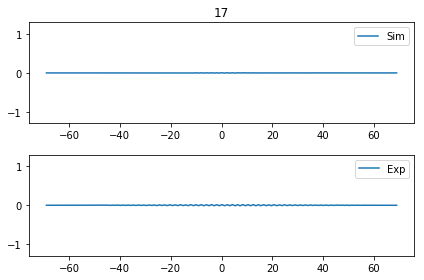

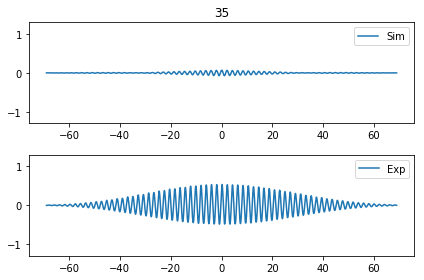

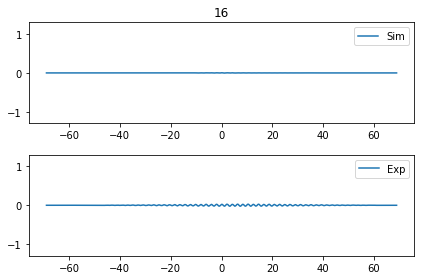

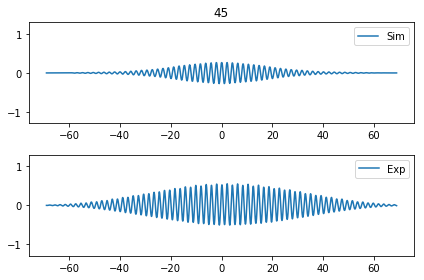

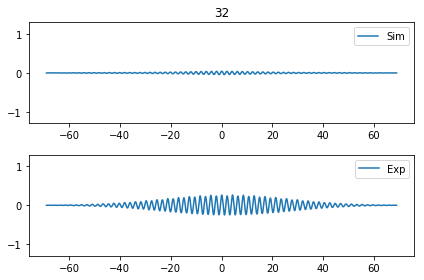

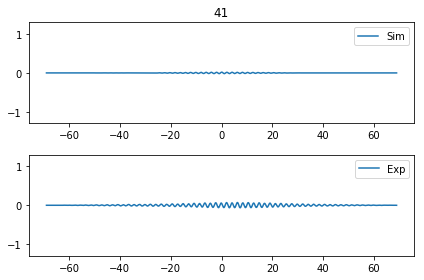

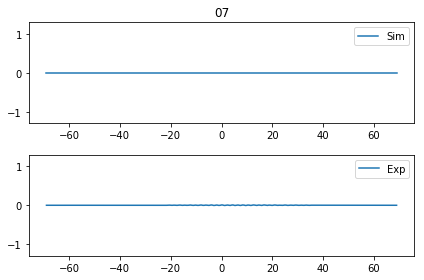

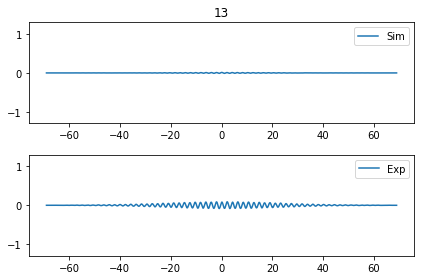

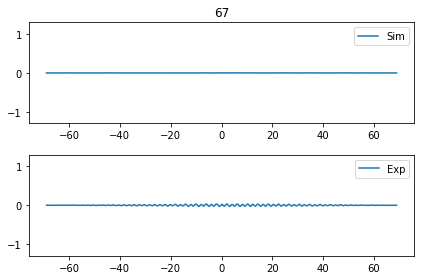

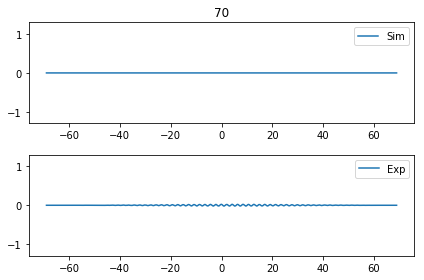

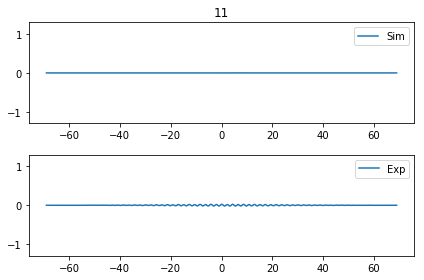

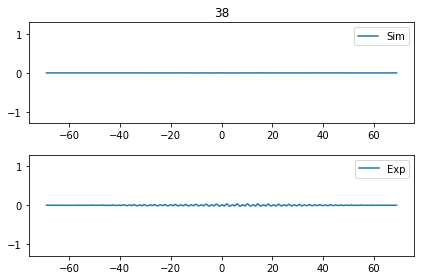

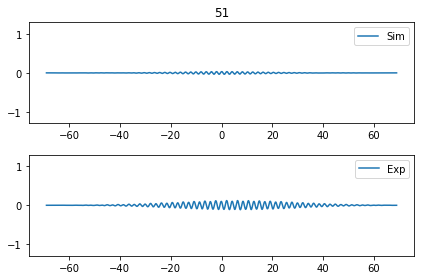

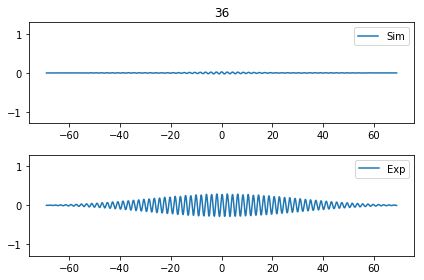

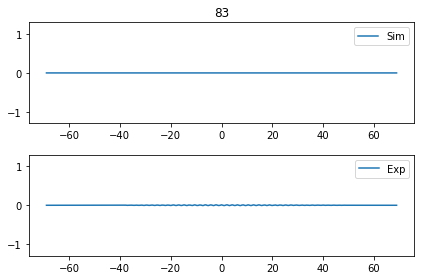

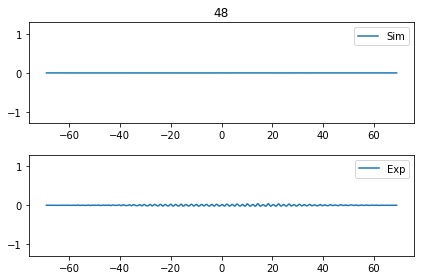

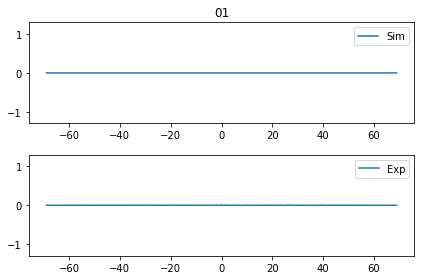

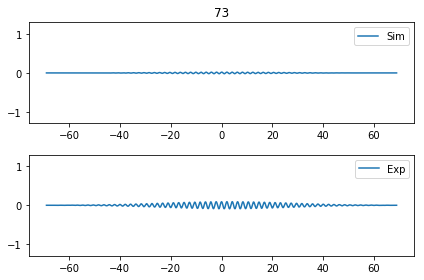

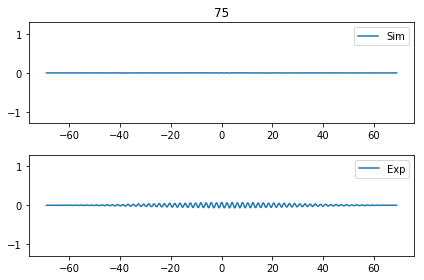

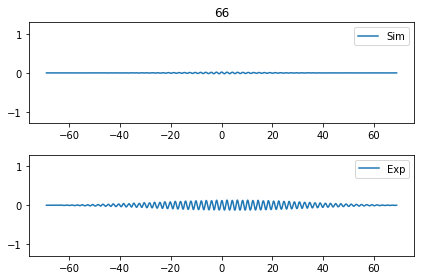

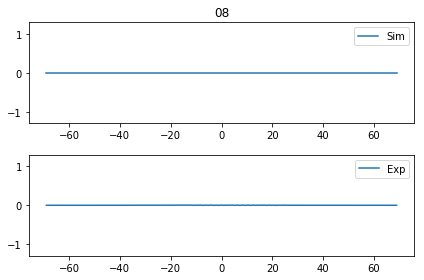

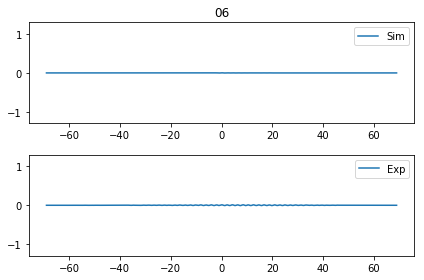

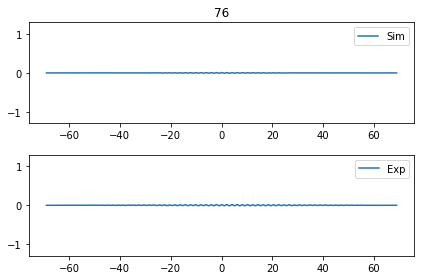

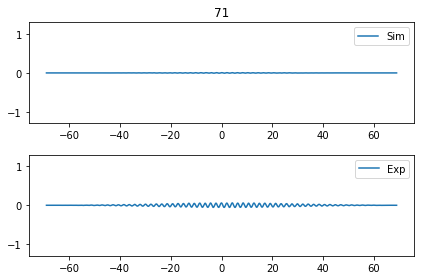

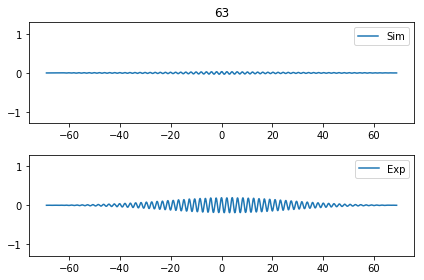

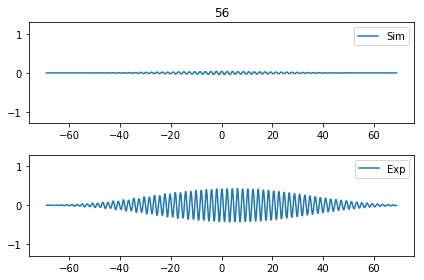

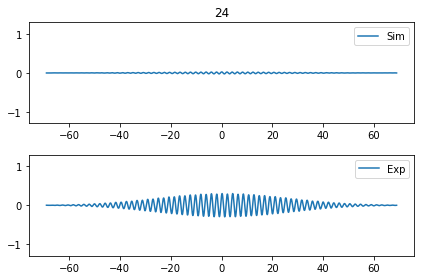

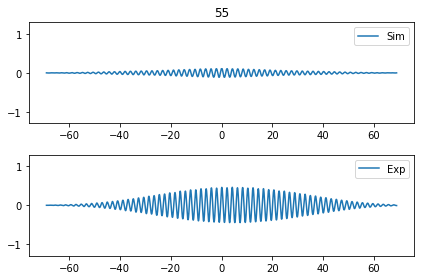

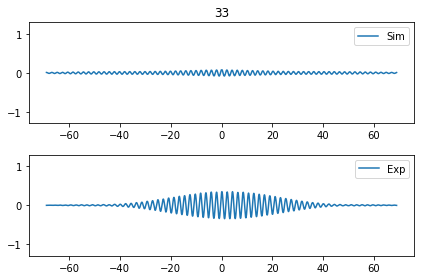

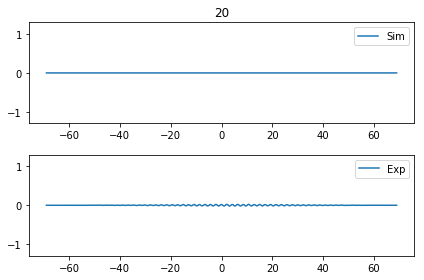

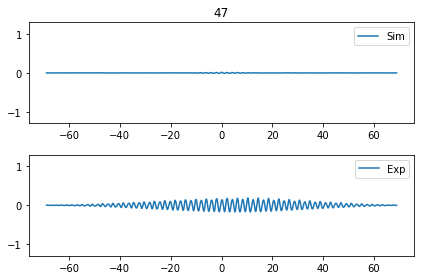

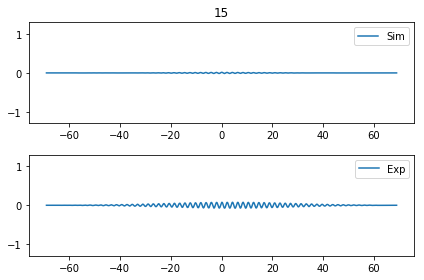

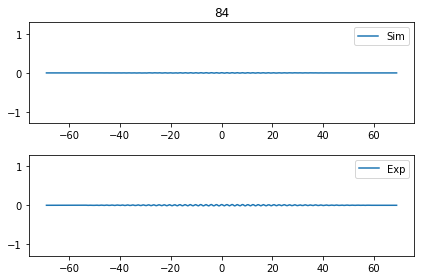

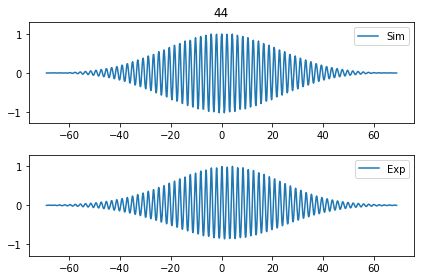

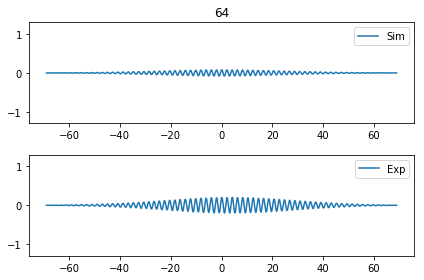

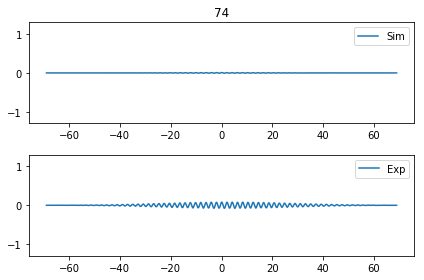

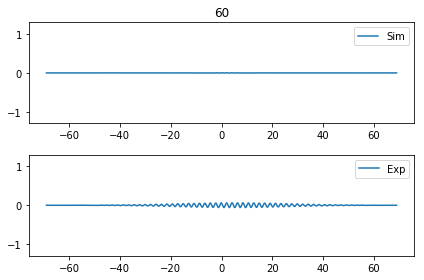

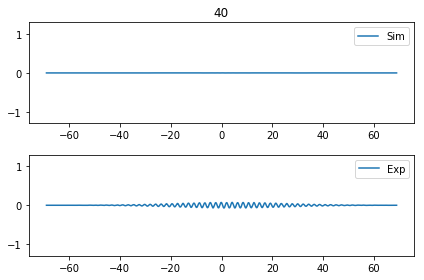

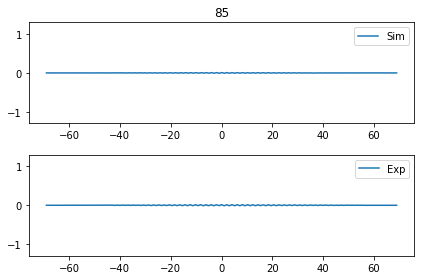

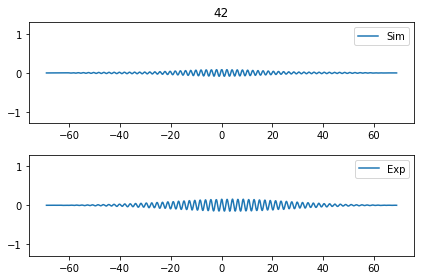

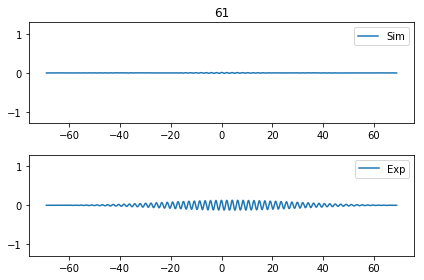

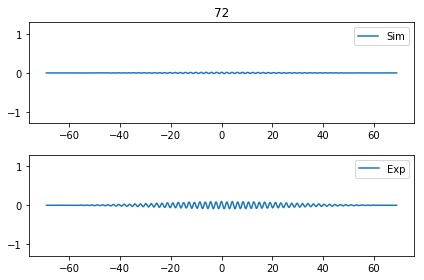

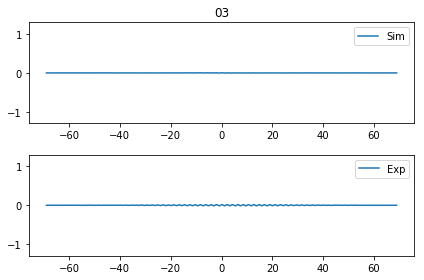

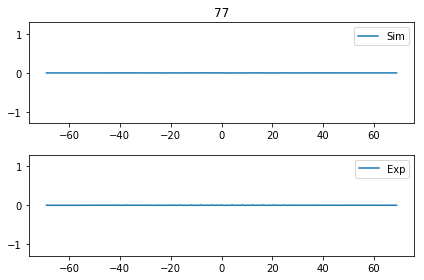

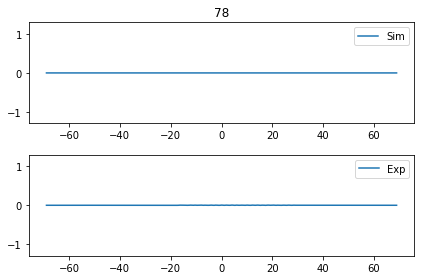

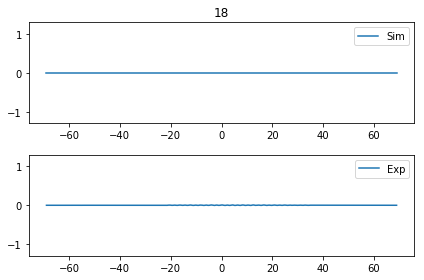

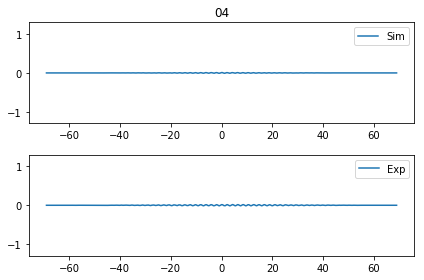

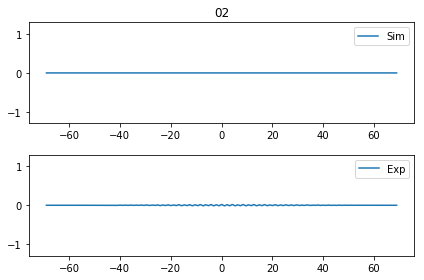

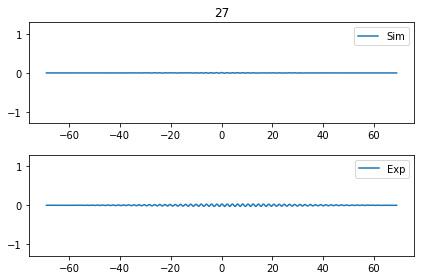

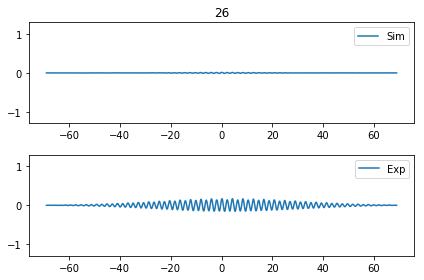

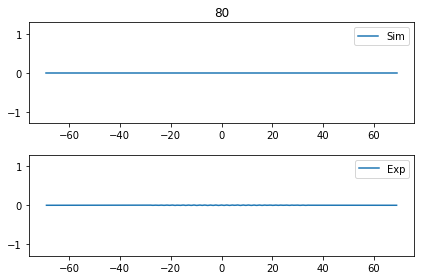

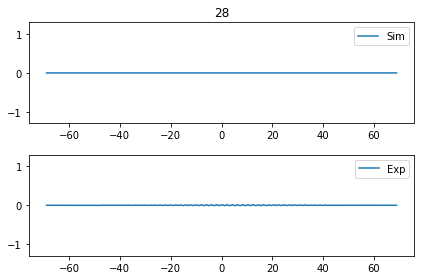

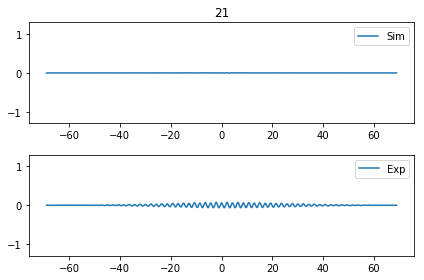

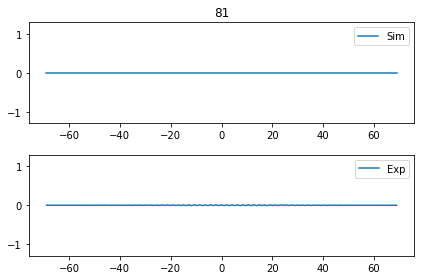

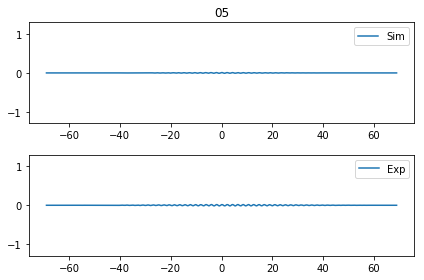

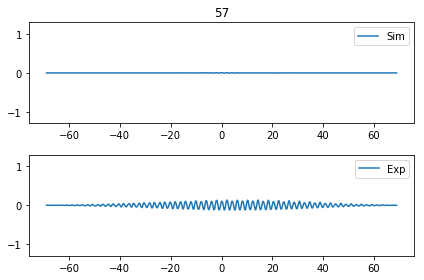

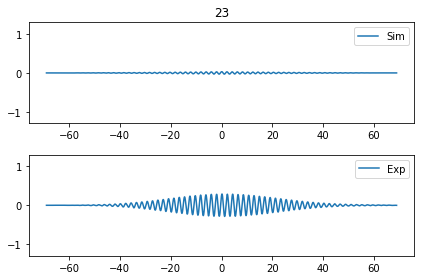

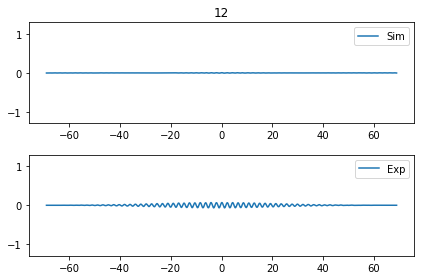

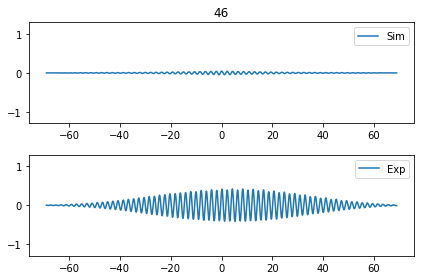

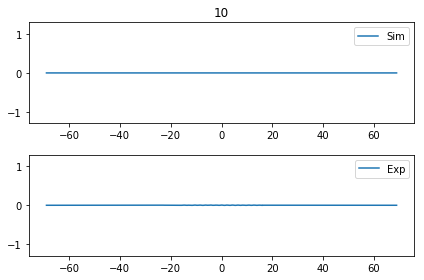

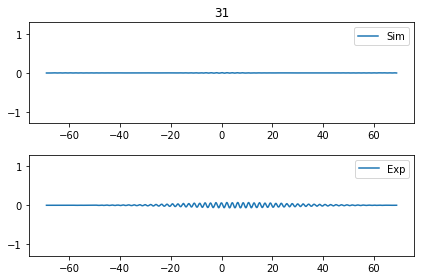

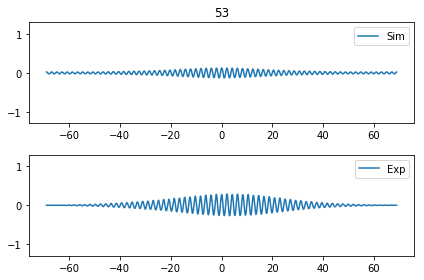

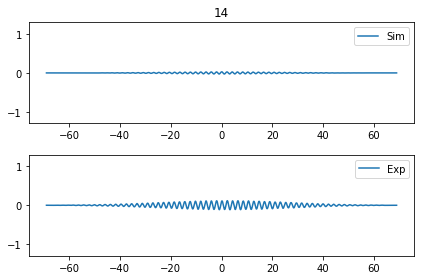

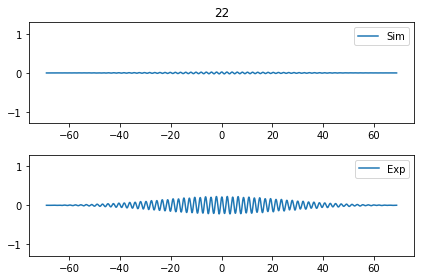

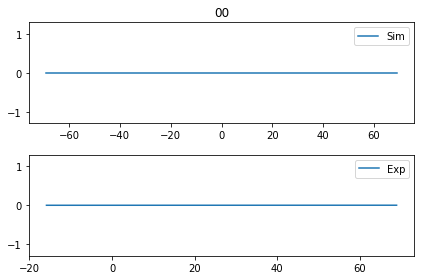

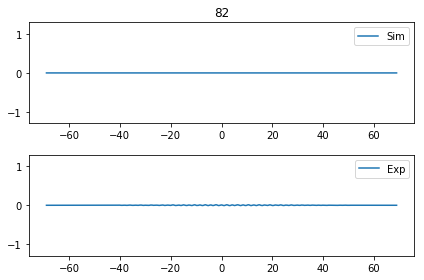

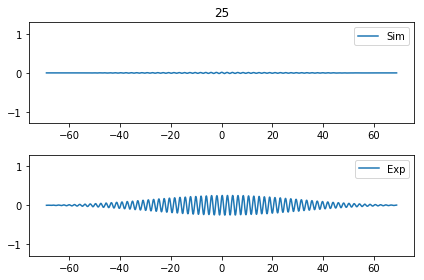

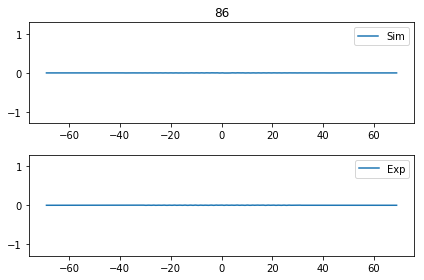

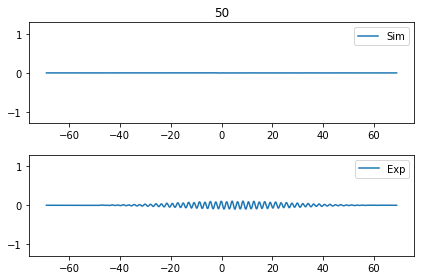

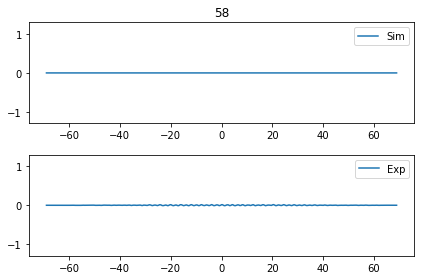

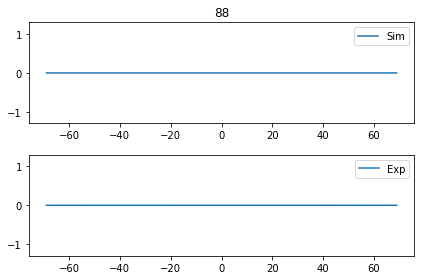

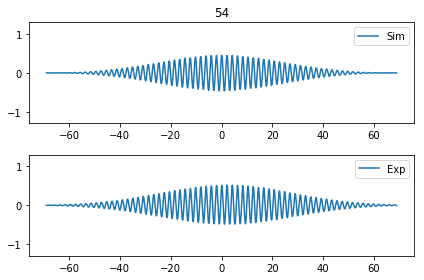

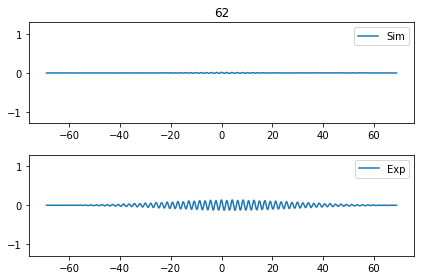

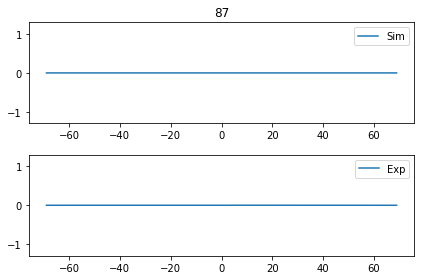

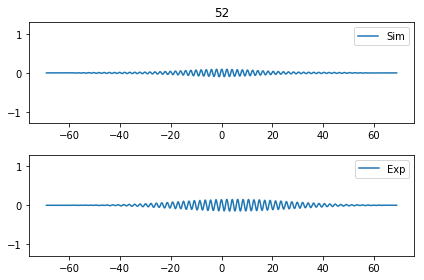

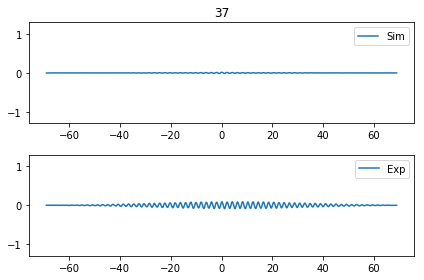

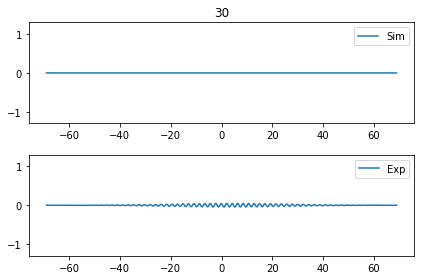

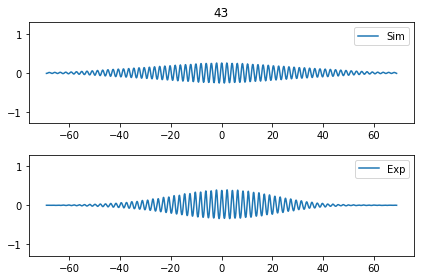

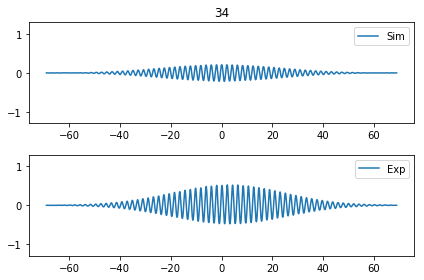

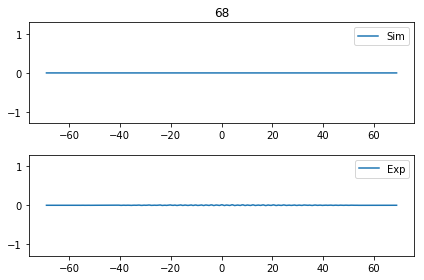

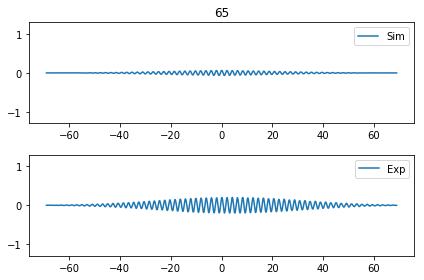

In [338]:
#finding matching
Matching = []
for i in range(len(ExpDir)):
    for j in range(len(ExpDir)):
        if ExpDir[i][-6:-4]==SimDir[j][-6:-4]:
            if ExpDir[i][-6:-4] not in Matching:
                Matching.append(ExpDir[i][-6:-4])
                SaveComparisonsBoth(SimDir[j],ExpDir[i])
                

In [316]:
a = list([1,2,3,4])
b = np.array(a)/2
print(b)

c = np.array([1,2,3,4])
print(b+c)

[ 0.5  1.   1.5  2. ]
[ 1.5  3.   4.5  6. ]


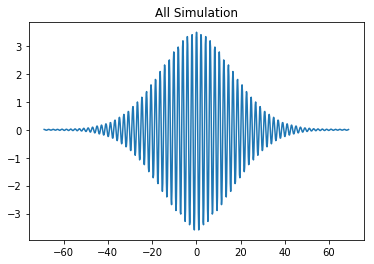

In [339]:
# now summing up all and comparing. 
Int = np.array([])
for j in range(len(SimDir)):
    with open('1/'+SimDir[j],'rb') as F:
        Ij2 = pickle.load(F)
    d2 = Ij2
    D2 = np.hanning(int(np.shape(d2)[0]))*d2
    S2 = np.fft.rfft(D2)
    u2 = np.abs(S2)
    A = 300*f[:]
    B = u2
    for i in range(len(A)):
        if A[i]<=30:
            B[i]=0
    ifX1 = np.fft.fftshift(np.fft.irfft(B-np.mean(B))) #with mean of B subtracted
    ifX = ifX1
    ifX[415]=max(ifX1) #just set to max of entire interferogram
    ij = np.array(ifX)/50852.3473551 #normalize
    if j ==0:
        Int=ij
    else:
        Int = Int+ij
pl.title('All Simulation')
pl.plot(Delay2,Int)
pl.savefig('/Users/Lab/Desktop/Comparison/AllSim.png',dpi=300)
pl.show()


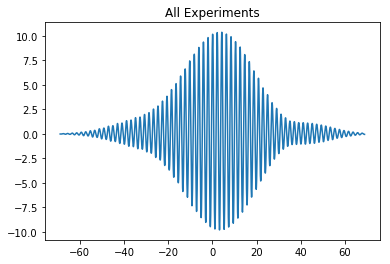

In [340]:
# now summing up all and comparing. 
Int = np.array([])
for j in range(len(ExpDir)):
    with open('/Users/Lab/Desktop/data_for_mira/144GHz/'+ExpDir[j],'rb',) as F:
        Z = pickle.load(F,encoding='latin1') 
    IjZ1 = Z['sig0F']
    IjZ = np.hanning(int(np.shape(IjZ1)[0]))*IjZ1
    DelayZ = Z['delay0F']
    ij = np.array(IjZ)/1.30118171724 #normalize
    if j ==0:
        Int=ij
    else:
        Int = Int+ij
idx1,idx2 = nearest(DelayZ,Delay2[0],Delay2[-1])# match delay value range from Zhaodi pickle files

pl.title('All Experiments')
pl.plot(DelayZ[idx1:idx2],Int[idx1:idx2])
pl.savefig('/Users/Lab/Desktop/Comparison/AllExp.png',dpi=300)
pl.show()


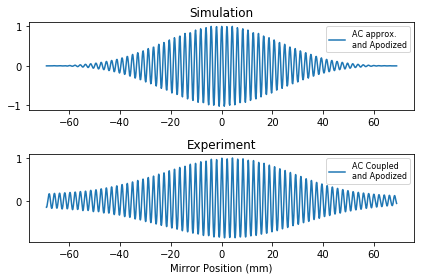

In [356]:
with open('Delay/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
    Delay2 = pickle.load(F)
with open('1/Ij_Chamb_144_Narrow_20_x-160.375_2.07mm_2019_08_15_22_57_10_44.pkl','rb') as F:
    Ij2 = pickle.load(F)
with open('/Users/Lab/Desktop/data_for_mira/144GHz/20180318_2155_150GHz_new_polarizer_44.pkl','rb',) as F:
    Z = pickle.load(F,encoding='latin1')  
    
SimNormFactor = 50852.3473551
ExpNormFactor = 1.30118171724
Lamd =2.089
Nsize = Nsized(Lamd)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

d2 = Ij2
D2 = np.hanning(int(np.shape(d2)[0]))*d2
S2 = np.fft.rfft(D2)
u2 = np.abs(S2)

A = 300*f[:]
B = u2
for i in range(len(A)):
    if A[i]<=30:
        B[i]=0
        
#pl.plot(A,B-np.mean(B))
#pl.xlim(0,200)
#pl.show()

#S2 = np.fft.rfft(Ij2[:]) #without hanning function
#u2 = np.abs(S2)
#A = 300*f[:]
#B = u2
#for i in range(len(A)):
    #if A[i]<=30:
        #B[i]=0
ifX1 = np.fft.fftshift(np.fft.irfft(B-np.mean(B))) #with mean of B subtracted
ifX = ifX1
ifX[415]=max(ifX1) #just set to max of entire interferogram
#pl.title('44 Simulation')
LimSim1 = max(ifX/SimNormFactor)
LimExp1 = max(IjZ/ExpNormFactor)
limB = max(LimSim1+.3*LimSim1,LimExp1+.3*LimExp1)

idx1,idx2 = nearest(DelayZ,Delay2[0],Delay2[-1])
# match delay value range from Zhaodi pickle files

IjZ = Z['sig0F']
DelayZ = Z['delay0F']
# now show plots with standard scale
#pl.figure()
fig,(ax1,ax2)=pl.subplots(2, 1)# sharex=True)
ax1.set_title('Simulation')
ax1.plot(Delay2,ifX/max(ifX),label = 'AC approx.\nand Apodized')
#ax1.set_ylim(-limB,limB)
#ax1.set_aspect((max(Delay2)-min(Delay2)/(limB+limB)))
ax1.legend(prop={'size': 8})
#pl.savefig('/Users/Lab/Desktop/sim1.png',dpi=300)

#pl.figure()
#pl.title(str(44)+' Experimental')
ax2.set_title('Experiment')
ax2.plot(DelayZ[idx1:idx2],IjZ[idx1:idx2]/max(IjZ[idx1:idx2]),label = 'AC Coupled\nand Apodized')
#ax2.set_ylim(-limB,limB)
#ax2.set_aspect((max(Delay2)-min(Delay2)/(limB+limB)))
ax2.legend(prop={'size': 8})
ax2.set_xlabel('Mirror Position (mm)')
pl.tight_layout()
pl.savefig('/Users/Lab/Desktop/CenterComparison1.png',dpi=500)




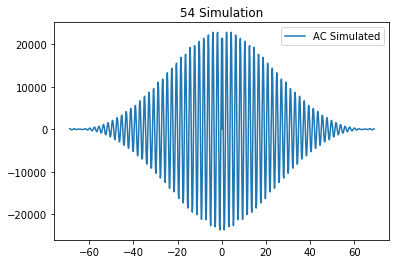

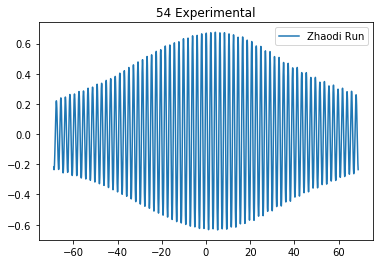

In [105]:
with open('1/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
    Delay2 = pickle.load(F)
with open('1/Ij_Chamb_144_Narrow_20_y-115.5_2.07mm_2019_08_17_10_12_51_54.pkl','rb') as F:
    Ij2 = pickle.load(F)
with open('/Users/Lab/Desktop/data_for_mira/144GHz/20180318_2157_150GHz_new_polarizer_54.pkl','rb',) as F:
    Z = pickle.load(F,encoding='latin1')  
    
Lamd =2.089
Nsize = Nsized(Lamd)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

d2 = Ij2
D2 = np.hanning(int(np.shape(d2)[0]))*d2
S2 = np.fft.rfft(D2)
u2 = np.abs(S2)

A = 300*f[:]
B = u2
for i in range(len(A)):
    if A[i]<=30:
        B[i]=0
        
#pl.plot(A,B-np.mean(B))
#pl.xlim(0,200)
#pl.show()

#S2 = np.fft.rfft(Ij2[:])
#u2 = np.abs(S2)
#A = 300*f[:]
#B = u2
#for i in range(len(A)):
    #if A[i]<=30:
        #B[i]=0
        
ifX = np.fft.fftshift(np.fft.irfft(B-np.mean(B)))
pl.title('54 Simulation')
pl.plot(Delay2,ifX,label = 'AC Simulated')
pl.legend()
pl.show()

def nearest(array, value1,value2):
    array = np.asarray(array)
    idx1 = (np.abs(array - value1)).argmin()
    idx2 = (np.abs(array - value2)).argmin()
    #return array[idx1],array[idx2],idx1,idx2
    return idx1, idx2
idx1,idx2 = nearest(DelayZ,Delay2[0],Delay2[-1])
# match delay value range from Zhaodi pickle files

IjZ = Z['sig0F']
DelayZ = Z['delay0F']
pl.title('54 Experimental')
pl.plot(DelayZ[idx1:idx2],IjZ[idx1:idx2],label = 'Zhaodi Run')
pl.legend()
pl.show()



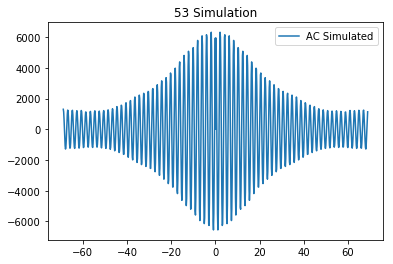

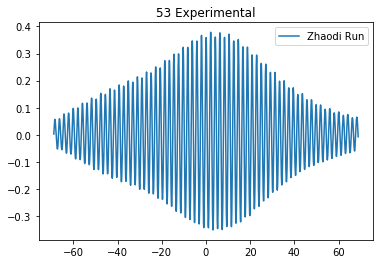

In [98]:
with open('1/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
    Delay2 = pickle.load(F)
with open('1/Ij_Chamb_144_Narrow_20_x-162.875_y-115.5_2.07mm_2019_08_27_04_50_43_53.pkl','rb') as F:
    Ij2 = pickle.load(F)
with open('/Users/Lab/Desktop/data_for_mira/144GHz/20180318_2139_150GHz_new_polarizer_53.pkl','rb',) as F:
    Z = pickle.load(F,encoding='latin1')  
    
Lamd =2.089
Nsize = Nsized(Lamd)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

d2 = Ij2
D2 = np.hanning(int(np.shape(d2)[0]))*d2
S2 = np.fft.rfft(D2)
u2 = np.abs(S2)

A = 300*f[:]
B = u2
for i in range(len(A)):
    if A[i]<=30:
        B[i]=0
        
#pl.plot(A,B-np.mean(B))
#pl.xlim(0,200)
#pl.show()

#S2 = np.fft.rfft(Ij2[:])
#u2 = np.abs(S2)
#A = 300*f[:]
#B = u2
#for i in range(len(A)):
    #if A[i]<=30:
        #B[i]=0
        
ifX = np.fft.fftshift(np.fft.irfft(B-np.mean(B)))
pl.title('53 Simulation')
pl.plot(Delay2,ifX,label = 'AC Simulated')
pl.legend()
pl.show()

def nearest(array, value1,value2):
    array = np.asarray(array)
    idx1 = (np.abs(array - value1)).argmin()
    idx2 = (np.abs(array - value2)).argmin()
    #return array[idx1],array[idx2],idx1,idx2
    return idx1, idx2
idx1,idx2 = nearest(DelayZ,Delay2[0],Delay2[-1])
# match delay value range from Zhaodi pickle files

IjZ = Z['sig0F']
DelayZ = Z['delay0F']
pl.title('53 Experimental')
pl.plot(DelayZ[idx1:idx2],IjZ[idx1:idx2],label = 'Zhaodi Run')
pl.legend()
pl.show()



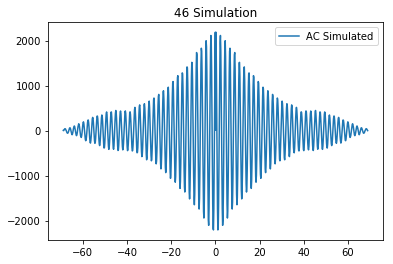

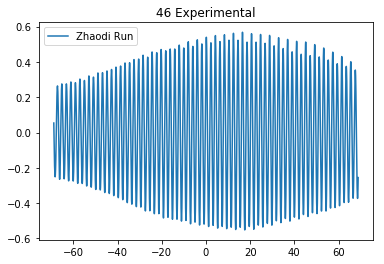

In [100]:
with open('1/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
    Delay2 = pickle.load(F)
with open('1/Ij_Chamb_144_Narrow_20_x-155.375_2.07mm_2019_08_17_01_08_20_46.pkl','rb') as F:
    Ij2 = pickle.load(F)
with open('/Users/Lab/Desktop/data_for_mira/144GHz/20180318_2222_150GHz_new_polarizer_46.pkl','rb',) as F:
    Z = pickle.load(F,encoding='latin1')  
    
Lamd =2.089
Nsize = Nsized(Lamd)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

d2 = Ij2
D2 = np.hanning(int(np.shape(d2)[0]))*d2
S2 = np.fft.rfft(D2)
u2 = np.abs(S2)

A = 300*f[:]
B = u2
for i in range(len(A)):
    if A[i]<=30:
        B[i]=0
        
#pl.plot(A,B-np.mean(B))
#pl.xlim(0,200)
#pl.show()

#S2 = np.fft.rfft(Ij2[:])
#u2 = np.abs(S2)
#A = 300*f[:]
#B = u2
#for i in range(len(A)):
    #if A[i]<=30:
        #B[i]=0
        
ifX = np.fft.fftshift(np.fft.irfft(B-np.mean(B)))
pl.title('46 Simulation')
pl.plot(Delay2,ifX,label = 'AC Simulated')
pl.legend()
pl.show()

def nearest(array, value1,value2):
    array = np.asarray(array)
    idx1 = (np.abs(array - value1)).argmin()
    idx2 = (np.abs(array - value2)).argmin()
    #return array[idx1],array[idx2],idx1,idx2
    return idx1, idx2
idx1,idx2 = nearest(DelayZ,Delay2[0],Delay2[-1])
# match delay value range from Zhaodi pickle files

IjZ = Z['sig0F']
DelayZ = Z['delay0F']
pl.title('46 Experimental')
pl.plot(DelayZ[idx1:idx2],IjZ[idx1:idx2],label = 'Zhaodi Run')
pl.legend()
pl.show()



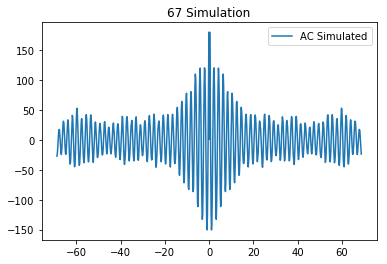

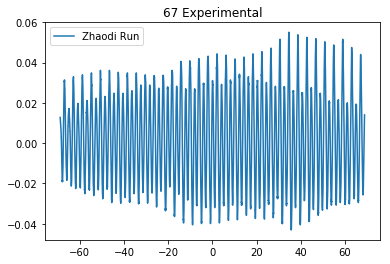

In [101]:
with open('1/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
    Delay2 = pickle.load(F)
with open('1/Ij_Chamb_144_Narrow_20_x-152.875_y-118.0_2.07mm_2019_08_28_02_49_44_67.pkl','rb') as F:
    Ij2 = pickle.load(F)
with open('/Users/Lab/Desktop/data_for_mira/144GHz/20180318_2242_150GHz_new_polarizer_67.pkl','rb',) as F:
    Z = pickle.load(F,encoding='latin1')  
    
Lamd =2.089
Nsize = Nsized(Lamd)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

d2 = Ij2
D2 = np.hanning(int(np.shape(d2)[0]))*d2
S2 = np.fft.rfft(D2)
u2 = np.abs(S2)

A = 300*f[:]
B = u2
for i in range(len(A)):
    if A[i]<=30:
        B[i]=0
        
#pl.plot(A,B-np.mean(B))
#pl.xlim(0,200)
#pl.show()

#S2 = np.fft.rfft(Ij2[:])
#u2 = np.abs(S2)
#A = 300*f[:]
#B = u2
#for i in range(len(A)):
    #if A[i]<=30:
        #B[i]=0
        
ifX = np.fft.fftshift(np.fft.irfft(B-np.mean(B)))
pl.title('67 Simulation')
pl.plot(Delay2,ifX,label = 'AC Simulated')
pl.legend()
pl.show()

def nearest(array, value1,value2):
    array = np.asarray(array)
    idx1 = (np.abs(array - value1)).argmin()
    idx2 = (np.abs(array - value2)).argmin()
    #return array[idx1],array[idx2],idx1,idx2
    return idx1, idx2
idx1,idx2 = nearest(DelayZ,Delay2[0],Delay2[-1])
# match delay value range from Zhaodi pickle files

IjZ = Z['sig0F']
DelayZ = Z['delay0F']
pl.title('67 Experimental')
pl.plot(DelayZ[idx1:idx2],IjZ[idx1:idx2],label = 'Zhaodi Run')
pl.legend()
pl.show()

